In [95]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import signal, fftpack
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import hilbert, chirp, find_peaks

# Persiapan Dataset

In [96]:
# Load data dari file csv

# 70%, Atas, 5 Sampel data
dfA701_data_range = pd.read_csv('A701.csv')
start_index = 1
end_index = 1551
dfA701 = dfA701_data_range[start_index:end_index]

dfA702_data_range = pd.read_csv('A702.csv')
start_index = 1
end_index = 1551
dfA702 = dfA702_data_range[start_index:end_index]

dfA703_data_range = pd.read_csv('A703.csv')
start_index = 1
end_index = 1551
dfA703 = dfA703_data_range[start_index:end_index]

dfA704_data_range = pd.read_csv('A704.csv')
start_index = 1
end_index = 1551
dfA704 = dfA704_data_range[start_index:end_index]

dfA705_data_range = pd.read_csv('A705.csv')
start_index = 1
end_index = 1551
dfA705 = dfA705_data_range[start_index:end_index]

# 70%, Samping, 5 Sampel data
dfS701_data_range = pd.read_csv('S701.csv')
start_index = 1
end_index = 1551
dfS701 = dfS701_data_range[start_index:end_index]

dfS702_data_range = pd.read_csv('S702.csv')
start_index = 1
end_index = 1551
dfS702 = dfS702_data_range[start_index:end_index]

dfS703_data_range = pd.read_csv('S703.csv')
start_index = 1
end_index = 1551
dfS703 = dfS703_data_range[start_index:end_index]

dfS704_data_range = pd.read_csv('S704.csv')
start_index = 1
end_index = 1551
dfS704 = dfS704_data_range[start_index:end_index]

dfS705_data_range = pd.read_csv('S705.csv')
start_index = 1
end_index = 1551
dfS705 = dfS705_data_range[start_index:end_index]

# 70%, Kecil, 2 Sampel data
dfK701_data_range = pd.read_csv('K701.csv')
start_index = 1
end_index = 1551
dfK701 = dfK701_data_range[start_index:end_index]

dfK702_data_range = pd.read_csv('K702.csv')
start_index = 1
end_index = 1551
dfK702 = dfK702_data_range[start_index:end_index]

In [97]:
# Signal Data, Atas
x1 = dfA701['X']
y1 = dfA701['Y']

x2 = dfA702['X']
y2 = dfA702['Y']

x3 = dfA703['X']
y3 = dfA703['Y']

x4 = dfA704['X']
y4 = dfA704['Y']

x5 = dfA705['X']
y5 = dfA705['Y']

# Signal Data, Samping
x6 = dfS701['X']
y6 = dfS701['Y']

x7 = dfS702['X']
y7 = dfS702['Y']

x8 = dfS703['X']
y8 = dfS703['Y']

x9 = dfS704['X']
y9 = dfS704['Y']

x10 = dfS705['X']
y10 = dfS705['Y']

# Signal Data, Kecil
x11 = dfK701['X']
y11 = dfK701['Y']

x12 = dfK702['X']
y12 = dfK702['Y']

# Head untuk masing-masing dataset


In [98]:
dfA701.head

<bound method NDFrame.head of               X         Y
1      5.015625  0.007812
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.046875
1547  29.171875  0.046875
1548  29.187500  0.050781
1549  29.203125  0.046875
1550  29.218750  0.050781

[1550 rows x 2 columns]>

In [99]:
dfA702.head

<bound method NDFrame.head of               X         Y
1      5.015625  0.003906
2      5.031250  0.007812
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.039062
1547  29.171875  0.046875
1548  29.187500  0.035156
1549  29.203125  0.046875
1550  29.218750  0.039062

[1550 rows x 2 columns]>

In [100]:
dfA703.head

<bound method NDFrame.head of               X         Y
1      5.015625  0.000000
2      5.031250  0.007812
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.039062
1547  29.171875  0.039062
1548  29.187500  0.042969
1549  29.203125  0.031250
1550  29.218750  0.042969

[1550 rows x 2 columns]>

In [101]:
dfA704.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.003906
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.039062
1547  29.171875  0.039062
1548  29.187500  0.039062
1549  29.203125  0.031250
1550  29.218750  0.039062

[1550 rows x 2 columns]>

In [102]:
dfA705.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.003906
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.035156
1547  29.171875  0.035156
1548  29.187500  0.039062
1549  29.203125  0.031250
1550  29.218750  0.035156

[1550 rows x 2 columns]>

In [103]:
dfS701.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.007812
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.035156
1547  29.171875  0.031250
1548  29.187500  0.031250
1549  29.203125  0.035156
1550  29.218750  0.031250

[1550 rows x 2 columns]>

In [104]:
dfS702.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.003906
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.035156
1547  29.171875  0.035156
1548  29.187500  0.031250
1549  29.203125  0.031250
1550  29.218750  0.031250

[1550 rows x 2 columns]>

In [105]:
dfS703.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.003906
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.027344
1547  29.171875  0.035156
1548  29.187500  0.031250
1549  29.203125  0.035156
1550  29.218750  0.027344

[1550 rows x 2 columns]>

In [106]:
dfS704.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.003906
2      5.031250 -0.007812
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.027344
1547  29.171875  0.035156
1548  29.187500  0.027344
1549  29.203125  0.031250
1550  29.218750  0.027344

[1550 rows x 2 columns]>

In [107]:
dfS705.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.011719
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.031250
1547  29.171875  0.027344
1548  29.187500  0.031250
1549  29.203125  0.027344
1550  29.218750  0.031250

[1550 rows x 2 columns]>

In [108]:
dfK701.head

<bound method NDFrame.head of               X         Y
1      5.015625 -0.003906
2      5.031250 -0.007812
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.035156
1547  29.171875  0.031250
1548  29.187500  0.035156
1549  29.203125  0.031250
1550  29.218750  0.027344

[1550 rows x 2 columns]>

In [109]:
dfK702.head

<bound method NDFrame.head of               X         Y
1      5.015625  0.000000
2      5.031250  0.000000
3      5.046875  0.023438
4      5.062500  0.117188
5      5.078125 -0.355469
...         ...       ...
1546  29.156250  0.035156
1547  29.171875  0.031250
1548  29.187500  0.031250
1549  29.203125  0.031250
1550  29.218750  0.035156

[1550 rows x 2 columns]>

# Plot Raw Data

## Sisi Atas

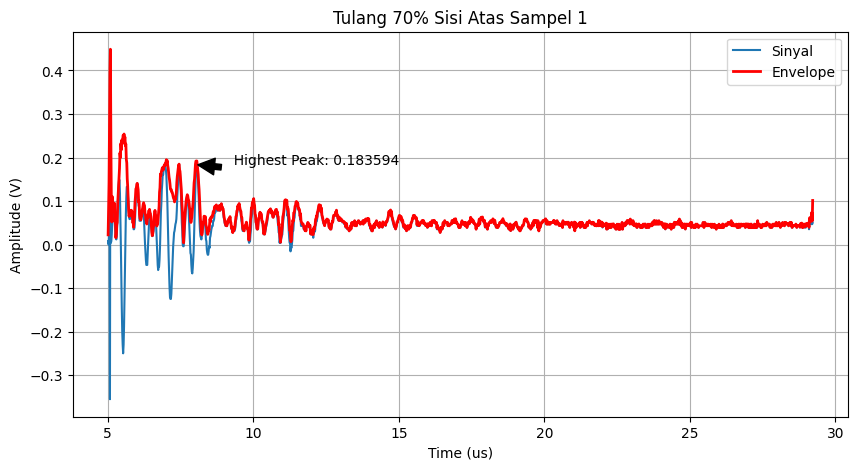

In [110]:
# A701
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y1[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y1)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x1, y1, label='Sinyal')
plt.plot(x1, amplitude_envelope, 'r', linewidth=2, label='Envelope')
plt.annotate(f'  Highest Peak: {y1[highest_peak]:.6f}', 
             xy=(x1[highest_peak], 
                 y1[highest_peak]),
             xytext=(x1[highest_peak]+1, y1[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Atas Sampel 1')
plt.legend()

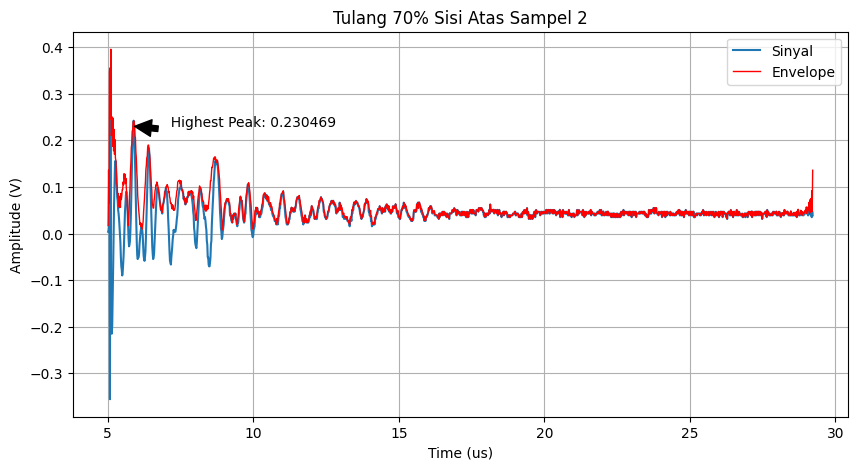

In [111]:
# A702
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y2[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y2)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x2, y2, label='Sinyal')
plt.plot(x2, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y2[highest_peak]:.6f}', 
             xy=(x2[highest_peak], 
                 y2[highest_peak]),
             xytext=(x2[highest_peak]+1, y2[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Atas Sampel 2')
plt.legend()

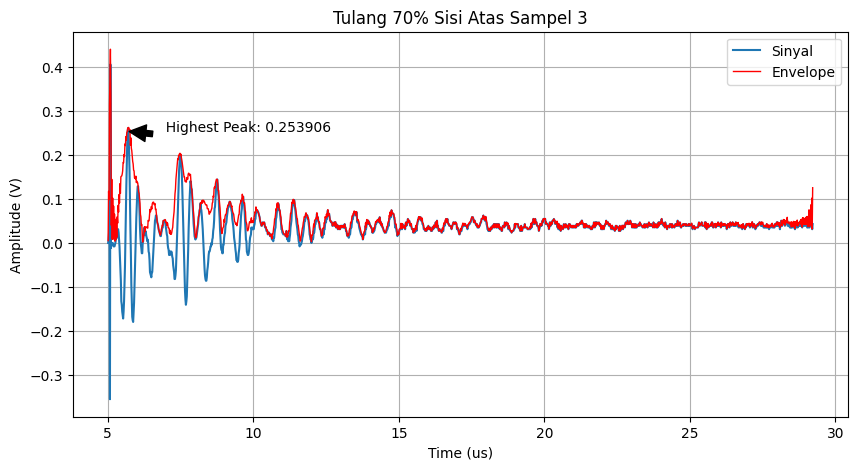

In [112]:
# A703
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y3[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y3)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x3, y3, label='Sinyal')
plt.plot(x3, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y3[highest_peak]:.6f}', 
             xy=(x3[highest_peak], 
                 y3[highest_peak]),
             xytext=(x3[highest_peak]+1, y3[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Atas Sampel 3')
plt.legend()

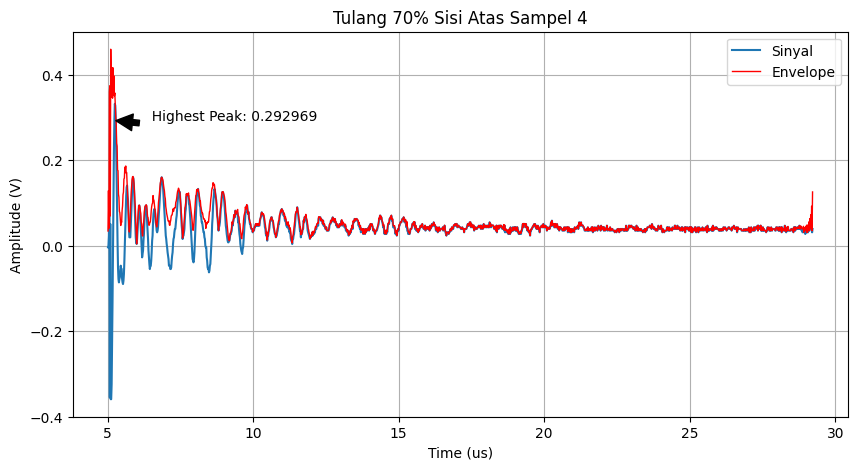

In [113]:
# A704
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y4[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y4)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x4, y4, label='Sinyal')
plt.plot(x4, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y4[highest_peak]:.6f}', 
             xy=(x4[highest_peak], 
                 y4[highest_peak]),
             xytext=(x4[highest_peak]+1, y4[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Atas Sampel 4')
plt.legend()

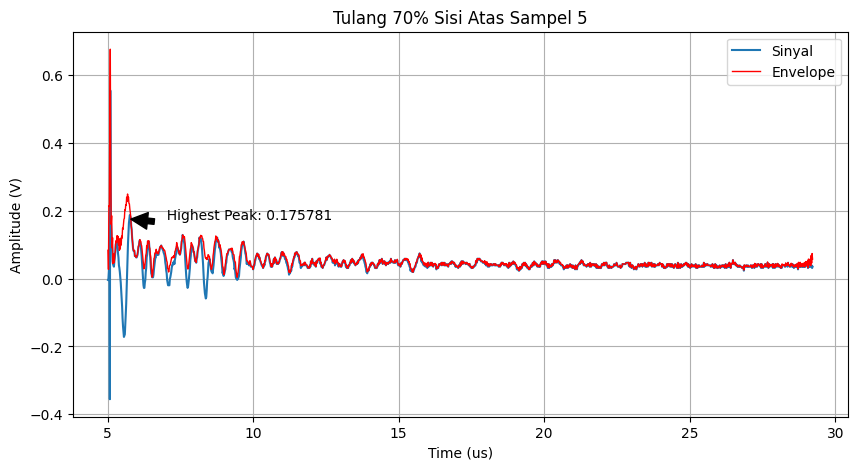

In [114]:
# A705
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y5[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y5)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x5, y5, label='Sinyal')
plt.plot(x5, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y5[highest_peak]:.6f}', 
             xy=(x5[highest_peak], 
                 y5[highest_peak]),
             xytext=(x5[highest_peak]+1, y5[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Atas Sampel 5')
plt.legend()

## Sisi Samping

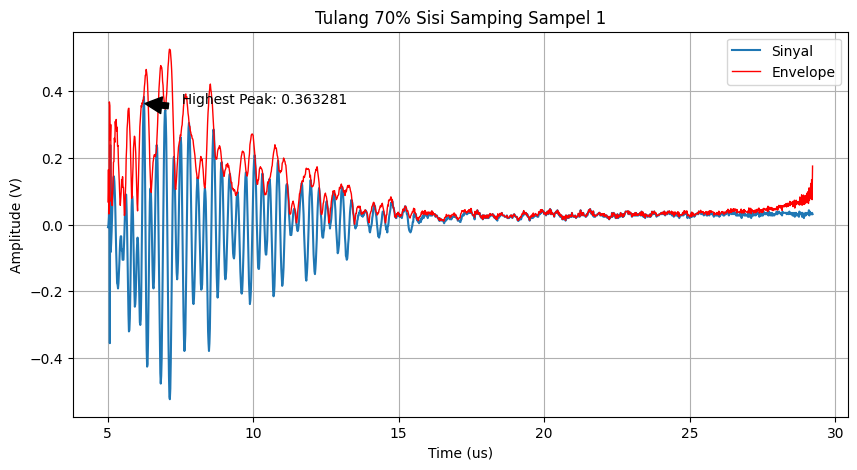

In [115]:
# S701
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y6[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y6)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x6, y6, label='Sinyal')
plt.plot(x6, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y6[highest_peak]:.6f}', 
             xy=(x6[highest_peak], 
                 y6[highest_peak]),
             xytext=(x6[highest_peak]+1, y6[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Samping Sampel 1')
plt.legend()

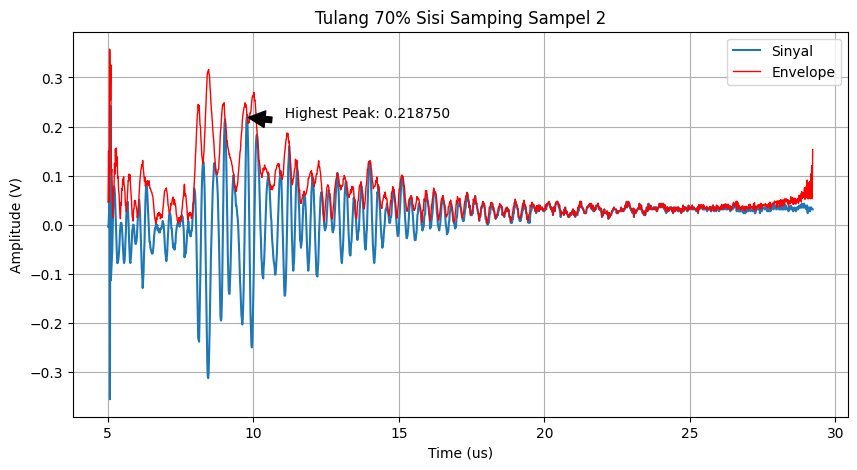

In [116]:
# S702
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y7[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y7)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x7, y7, label='Sinyal')
plt.plot(x7, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y7[highest_peak]:.6f}', 
             xy=(x7[highest_peak], 
                 y7[highest_peak]),
             xytext=(x7[highest_peak]+1, y7[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Samping Sampel 2')
plt.legend()

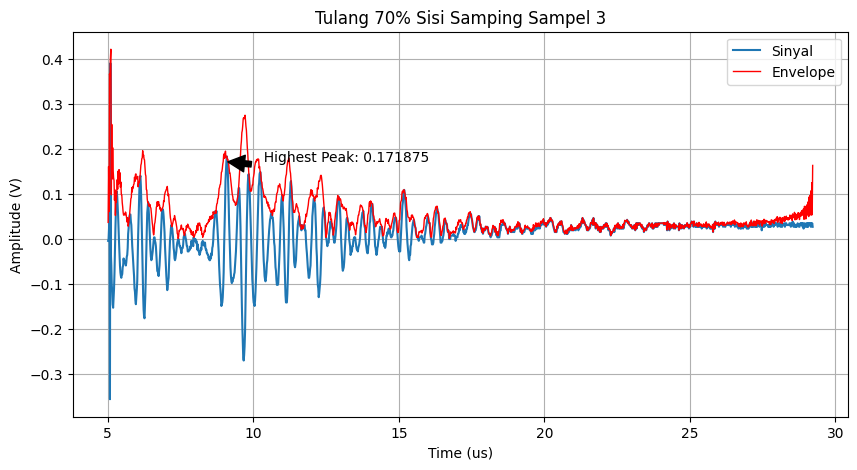

In [117]:
# S703
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y8[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y8)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x8, y8, label='Sinyal')
plt.plot(x8, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y8[highest_peak]:.6f}', 
             xy=(x8[highest_peak], 
                 y8[highest_peak]),
             xytext=(x8[highest_peak]+1, y8[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Samping Sampel 3')
plt.legend()

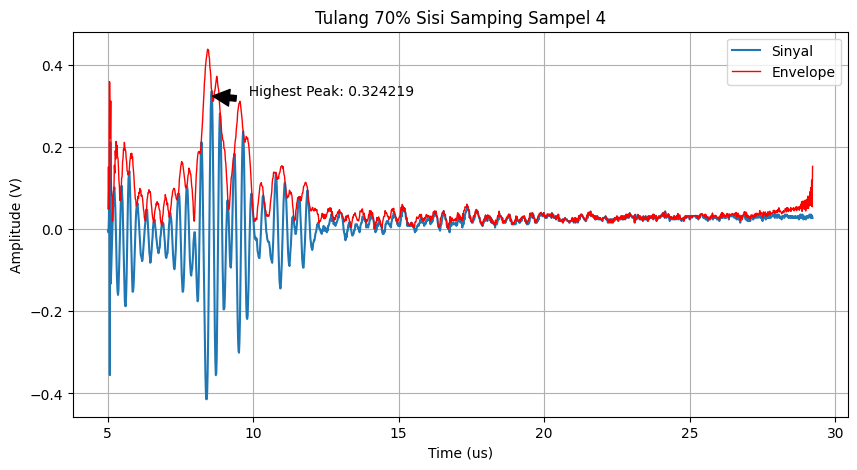

In [118]:
# S704
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y9[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y9)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x9, y9, label='Sinyal')
plt.plot(x9, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y9[highest_peak]:.6f}', 
             xy=(x9[highest_peak], 
                 y9[highest_peak]),
             xytext=(x9[highest_peak]+1, y9[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Samping Sampel 4')
plt.legend()

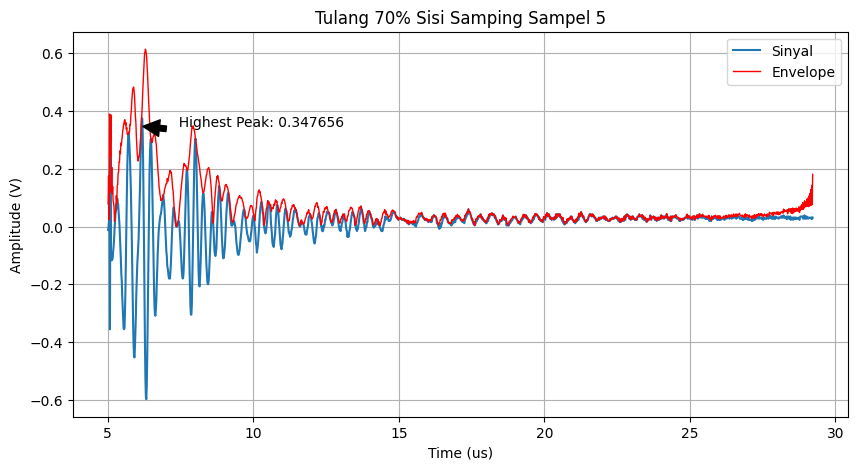

In [119]:
# S705
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y10[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y10)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x10, y10, label='Sinyal')
plt.plot(x10, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y10[highest_peak]:.6f}', 
             xy=(x10[highest_peak], 
                 y10[highest_peak]),
             xytext=(x10[highest_peak]+1, y10[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Samping Sampel 5')
plt.legend()

## Sisi Kecil

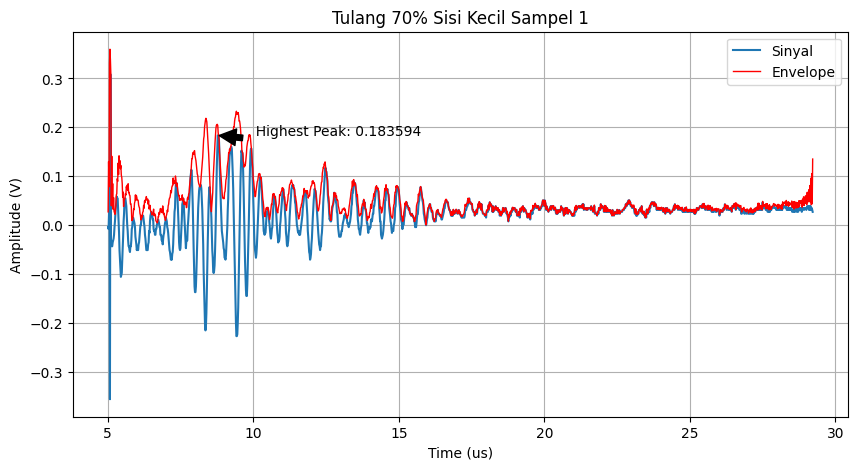

In [120]:
# K701
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y11[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y11)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x11, y11, label='Sinyal')
plt.plot(x11, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y11[highest_peak]:.6f}', 
             xy=(x11[highest_peak], 
                 y11[highest_peak]),
             xytext=(x11[highest_peak]+1, y11[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Kecil Sampel 1')
plt.legend()

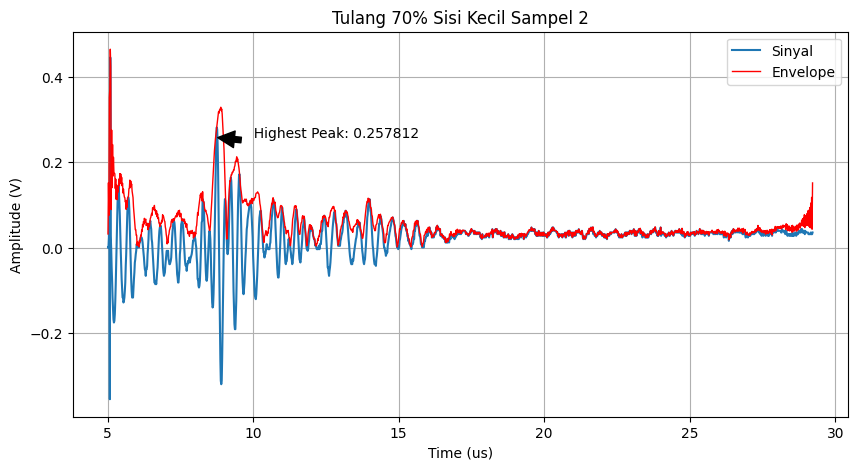

In [121]:
# K702
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y12[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y12)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x11, y12, label='Sinyal')
plt.plot(x11, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y12[highest_peak]:.6f}', 
             xy=(x11[highest_peak], 
                 y12[highest_peak]),
             xytext=(x11[highest_peak]+1, y12[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70% Sisi Kecil Sampel 2')
plt.legend()

# Parameter Filter, Apply Bandpass, Rectify Signal

In [122]:
# Define the filter parameters
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

## Apply a bandpass filter to the signal

In [123]:
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')

# Filtered Variables
filtered_signal1 = signal.filtfilt(b, a, y1)
filtered_signal2 = signal.filtfilt(b, a, y2)
filtered_signal3 = signal.filtfilt(b, a, y3)
filtered_signal4 = signal.filtfilt(b, a, y4)
filtered_signal5 = signal.filtfilt(b, a, y5)
filtered_signal6 = signal.filtfilt(b, a, y6)
filtered_signal7 = signal.filtfilt(b, a, y7)
filtered_signal8 = signal.filtfilt(b, a, y8)
filtered_signal9 = signal.filtfilt(b, a, y9)
filtered_signal10 = signal.filtfilt(b, a, y10)
filtered_signal11 = signal.filtfilt(b, a, y11)
filtered_signal12 = signal.filtfilt(b, a, y12)

## Rectify the Signal

In [124]:
# Rectified Variables
rectified_signal1 = np.abs(filtered_signal1)
rectified_signal2 = np.abs(filtered_signal2)
rectified_signal3 = np.abs(filtered_signal3)
rectified_signal4 = np.abs(filtered_signal4)
rectified_signal5 = np.abs(filtered_signal5)
rectified_signal6 = np.abs(filtered_signal6)
rectified_signal7 = np.abs(filtered_signal7)
rectified_signal8 = np.abs(filtered_signal8)
rectified_signal9 = np.abs(filtered_signal9)
rectified_signal10 = np.abs(filtered_signal10)
rectified_signal11 = np.abs(filtered_signal11)
rectified_signal12 = np.abs(filtered_signal12)

## Perform Fourier Transform

In [125]:
# Perform Fourier transform
signal_fft1 = np.fft.fft(filtered_signal1)
signal_freq1 = np.fft.fftfreq(len(filtered_signal1), 1/fs)

signal_fft2 = np.fft.fft(filtered_signal2)
signal_freq2 = np.fft.fftfreq(len(filtered_signal2), 1/fs)

signal_fft3 = np.fft.fft(filtered_signal3)
signal_freq3 = np.fft.fftfreq(len(filtered_signal3), 1/fs)

signal_fft4 = np.fft.fft(filtered_signal4)
signal_freq4 = np.fft.fftfreq(len(filtered_signal4), 1/fs)

signal_fft5 = np.fft.fft(filtered_signal5)
signal_freq5 = np.fft.fftfreq(len(filtered_signal5), 1/fs)

signal_fft6 = np.fft.fft(filtered_signal6)
signal_freq6 = np.fft.fftfreq(len(filtered_signal6), 1/fs)

signal_fft7 = np.fft.fft(filtered_signal7)
signal_freq7 = np.fft.fftfreq(len(filtered_signal7), 1/fs)

signal_fft8 = np.fft.fft(filtered_signal8)
signal_freq8 = np.fft.fftfreq(len(filtered_signal8), 1/fs)

signal_fft9 = np.fft.fft(filtered_signal9)
signal_freq9 = np.fft.fftfreq(len(filtered_signal9), 1/fs)

signal_fft10 = np.fft.fft(filtered_signal10)
signal_freq10 = np.fft.fftfreq(len(filtered_signal10), 1/fs)

signal_fft11 = np.fft.fft(filtered_signal11)
signal_freq11 = np.fft.fftfreq(len(filtered_signal11), 1/fs)

signal_fft12 = np.fft.fft(filtered_signal12)
signal_freq12 = np.fft.fftfreq(len(filtered_signal12), 1/fs)

## One-Sided FFT and Discard Negative Frequencies

In [126]:
# Atas
n = len(filtered_signal1)
freq1 = signal_freq1[0:int(n/2)]
fft_amp1 = np.abs(signal_fft1)[0:int(n/2)]/n*2

n = len(filtered_signal2)
freq2 = signal_freq2[0:int(n/2)]
fft_amp2 = np.abs(signal_fft2)[0:int(n/2)]/n*2

n = len(filtered_signal3)
freq3 = signal_freq3[0:int(n/2)]
fft_amp3 = np.abs(signal_fft3)[0:int(n/2)]/n*2

n = len(filtered_signal4)
freq4 = signal_freq4[0:int(n/2)]
fft_amp4 = np.abs(signal_fft4)[0:int(n/2)]/n*2

n = len(filtered_signal5)
freq5 = signal_freq5[0:int(n/2)]
fft_amp5 = np.abs(signal_fft5)[0:int(n/2)]/n*2

# Samping
n = len(filtered_signal6)
freq6 = signal_freq6[0:int(n/2)]
fft_amp6 = np.abs(signal_fft6)[0:int(n/2)]/n*2

n = len(filtered_signal7)
freq7 = signal_freq7[0:int(n/2)]
fft_amp7 = np.abs(signal_fft7)[0:int(n/2)]/n*2

n = len(filtered_signal8)
freq8 = signal_freq8[0:int(n/2)]
fft_amp8 = np.abs(signal_fft8)[0:int(n/2)]/n*2

n = len(filtered_signal9)
freq9 = signal_freq9[0:int(n/2)]
fft_amp9 = np.abs(signal_fft9)[0:int(n/2)]/n*2

n = len(filtered_signal10)
freq10 = signal_freq10[0:int(n/2)]
fft_amp10 = np.abs(signal_fft10)[0:int(n/2)]/n*2

# Kecil
n = len(filtered_signal11)
freq11 = signal_freq11[0:int(n/2)]
fft_amp11 = np.abs(signal_fft11)[0:int(n/2)]/n*2

n = len(filtered_signal12)
freq12 = signal_freq12[0:int(n/2)]
fft_amp12 = np.abs(signal_fft12)[0:int(n/2)]/n*2

## PSD Calculation

In [127]:
# Perform power spectral density (PSD) calculation
psd1 = (1/(fs*n)) * np.square(np.abs(signal_fft1[:n//2]))
psd2 = (1/(fs*n)) * np.square(np.abs(signal_fft2[:n//2]))
psd3 = (1/(fs*n)) * np.square(np.abs(signal_fft3[:n//2]))
psd4 = (1/(fs*n)) * np.square(np.abs(signal_fft4[:n//2]))
psd5 = (1/(fs*n)) * np.square(np.abs(signal_fft5[:n//2]))
psd6 = (1/(fs*n)) * np.square(np.abs(signal_fft6[:n//2]))
psd7 = (1/(fs*n)) * np.square(np.abs(signal_fft7[:n//2]))
psd8 = (1/(fs*n)) * np.square(np.abs(signal_fft8[:n//2]))
psd9 = (1/(fs*n)) * np.square(np.abs(signal_fft9[:n//2]))
psd10 = (1/(fs*n)) * np.square(np.abs(signal_fft10[:n//2]))
psd11 = (1/(fs*n)) * np.square(np.abs(signal_fft11[:n//2]))
psd12 = (1/(fs*n)) * np.square(np.abs(signal_fft12[:n//2]))

## Perform one-sided PSD (discard negative frequencies)

In [128]:
# Perform one-sided PSD (discard negative frequencies)
freq_psd1 = signal_freq1[0:int(n/2)]
psd_one_sided1 = psd1[0:int(n/2)]

freq_psd2 = signal_freq2[0:int(n/2)]
psd_one_sided2 = psd2[0:int(n/2)]

freq_psd3 = signal_freq3[0:int(n/2)]
psd_one_sided3 = psd3[0:int(n/2)]

freq_psd4 = signal_freq4[0:int(n/2)]
psd_one_sided4 = psd4[0:int(n/2)]

freq_psd5 = signal_freq5[0:int(n/2)]
psd_one_sided5 = psd5[0:int(n/2)]

freq_psd6 = signal_freq6[0:int(n/2)]
psd_one_sided6 = psd6[0:int(n/2)]

freq_psd7 = signal_freq7[0:int(n/2)]
psd_one_sided7 = psd7[0:int(n/2)]

freq_psd8 = signal_freq8[0:int(n/2)]
psd_one_sided8 = psd8[0:int(n/2)]

freq_psd9 = signal_freq9[0:int(n/2)]
psd_one_sided9 = psd9[0:int(n/2)]

freq_psd10 = signal_freq10[0:int(n/2)]
psd_one_sided10 = psd10[0:int(n/2)]

freq_psd11 = signal_freq11[0:int(n/2)]
psd_one_sided11 = psd11[0:int(n/2)]

freq_psd12 = signal_freq12[0:int(n/2)]
psd_one_sided12 = psd12[0:int(n/2)]

# Plot hasil pengolahan

## Plot All (Filtered, Rectify, FFT, PSD)

### Atas

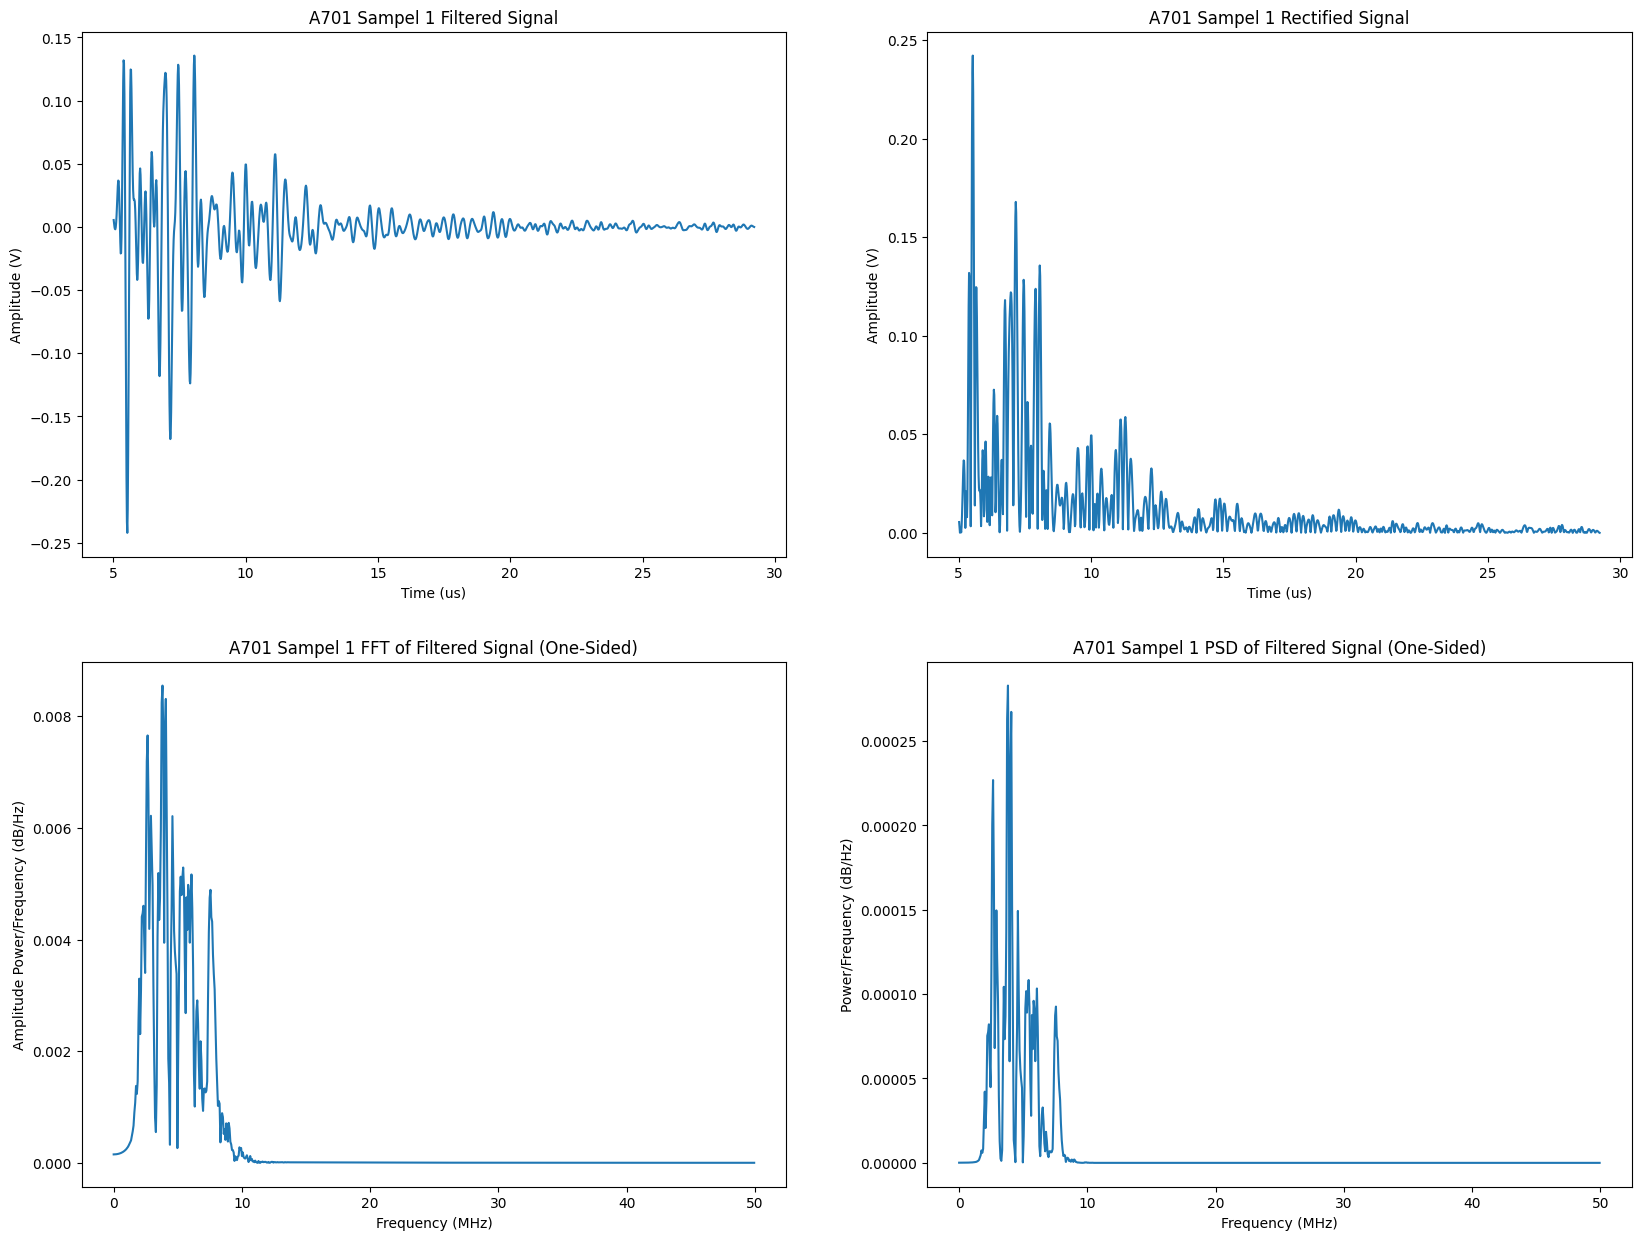

In [129]:
# A701
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x1, filtered_signal1)
axs[0, 0].set_title('A701 Sampel 1 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x1, rectified_signal1)
axs[0, 1].set_title('A701 Sampel 1 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq1, fft_amp1)
axs[1, 0].set_title('A701 Sampel 1 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd1, psd_one_sided1)
axs[1, 1].set_title('A701 Sampel 1 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

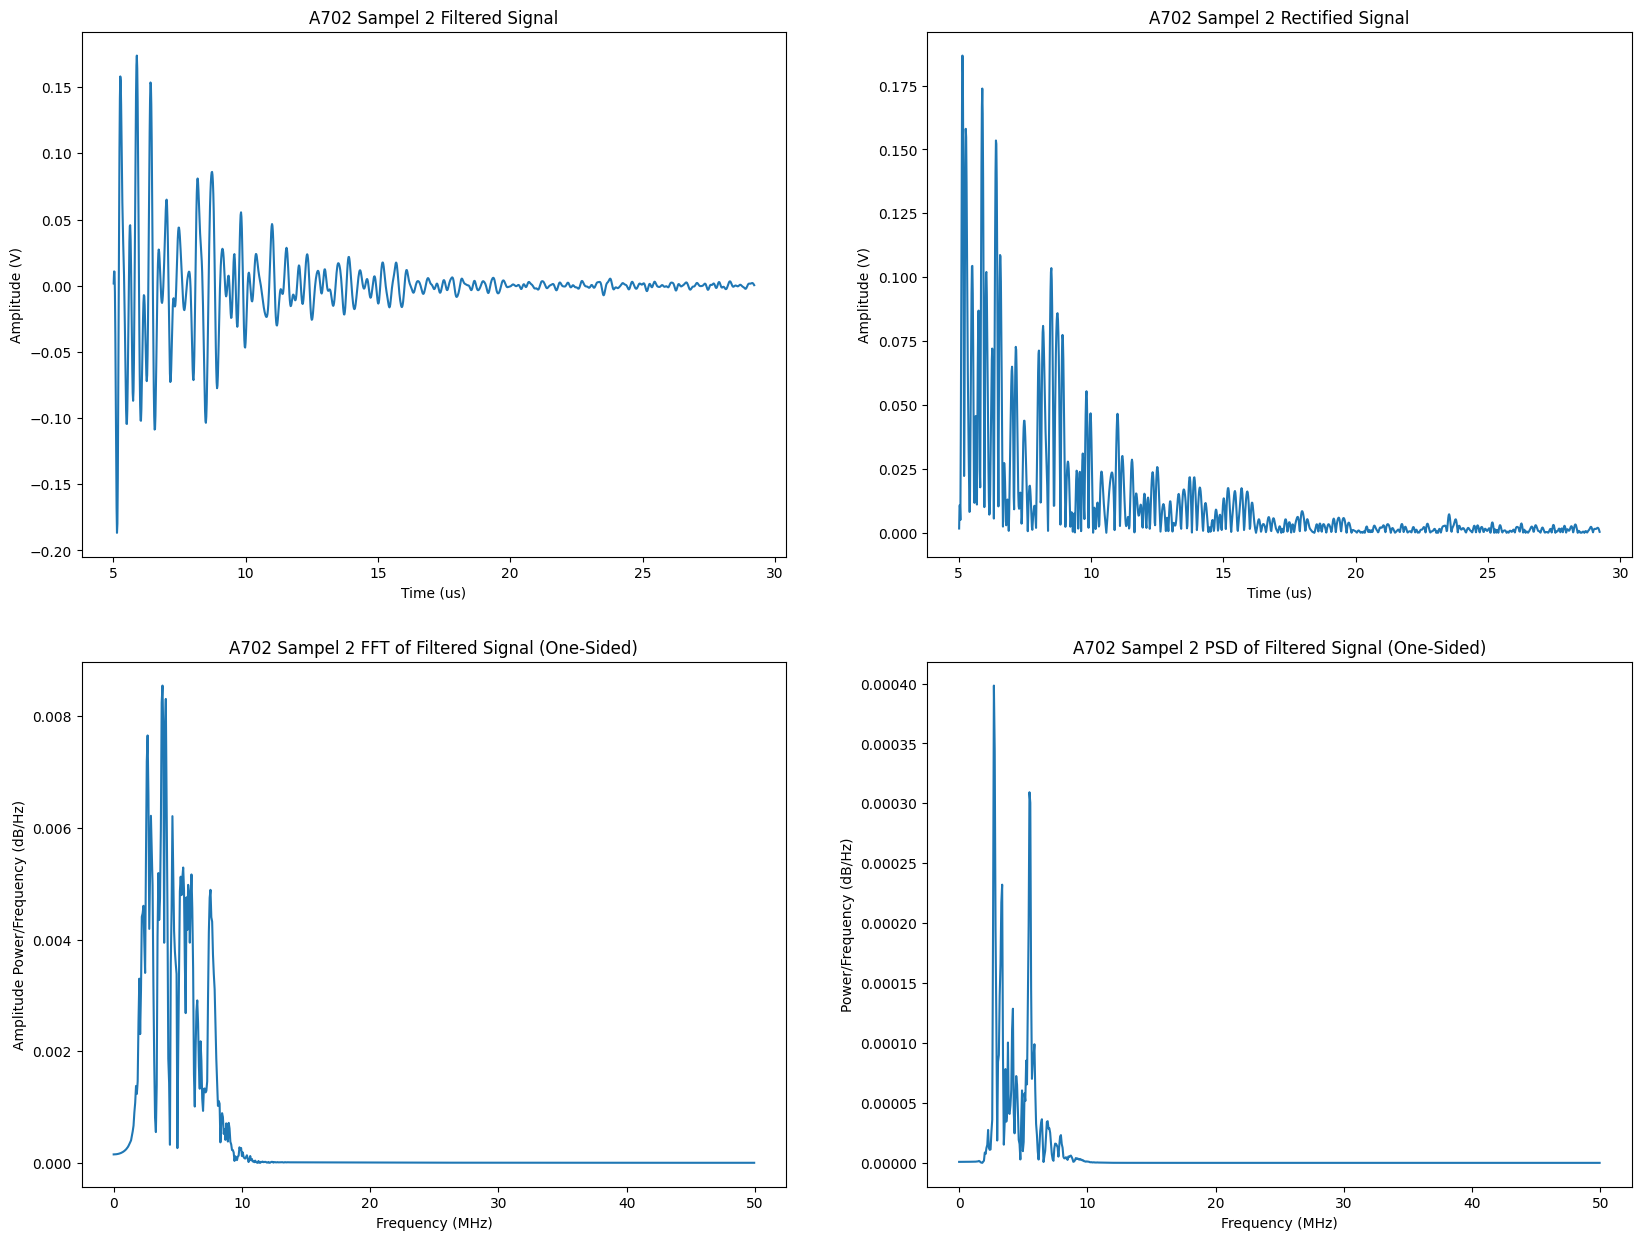

In [130]:
# A702
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x2, filtered_signal2)
axs[0, 0].set_title('A702 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x2, rectified_signal2)
axs[0, 1].set_title('A702 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq2, fft_amp1)
axs[1, 0].set_title('A702 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd2, psd_one_sided2)
axs[1, 1].set_title('A702 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

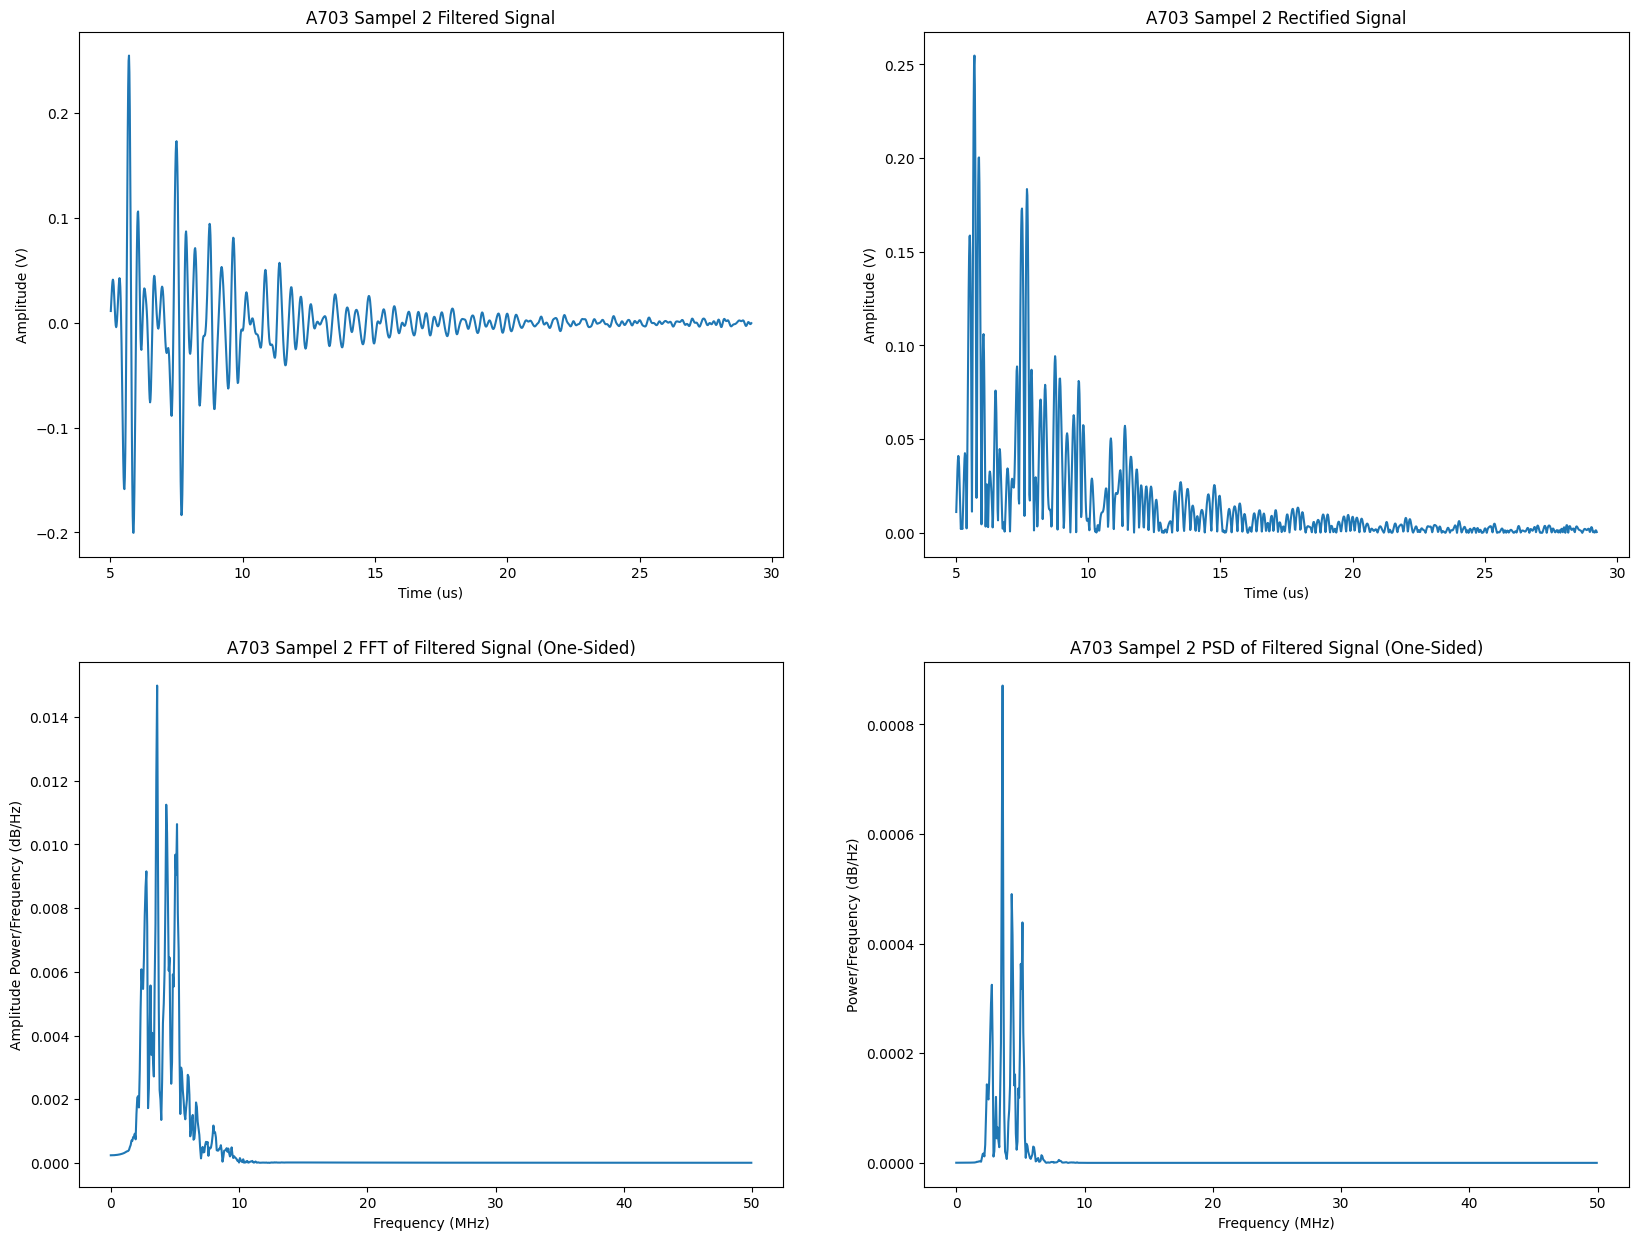

In [131]:
# A703
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x3, filtered_signal3)
axs[0, 0].set_title('A703 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x3, rectified_signal3)
axs[0, 1].set_title('A703 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq3, fft_amp3)
axs[1, 0].set_title('A703 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd3, psd_one_sided3)
axs[1, 1].set_title('A703 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

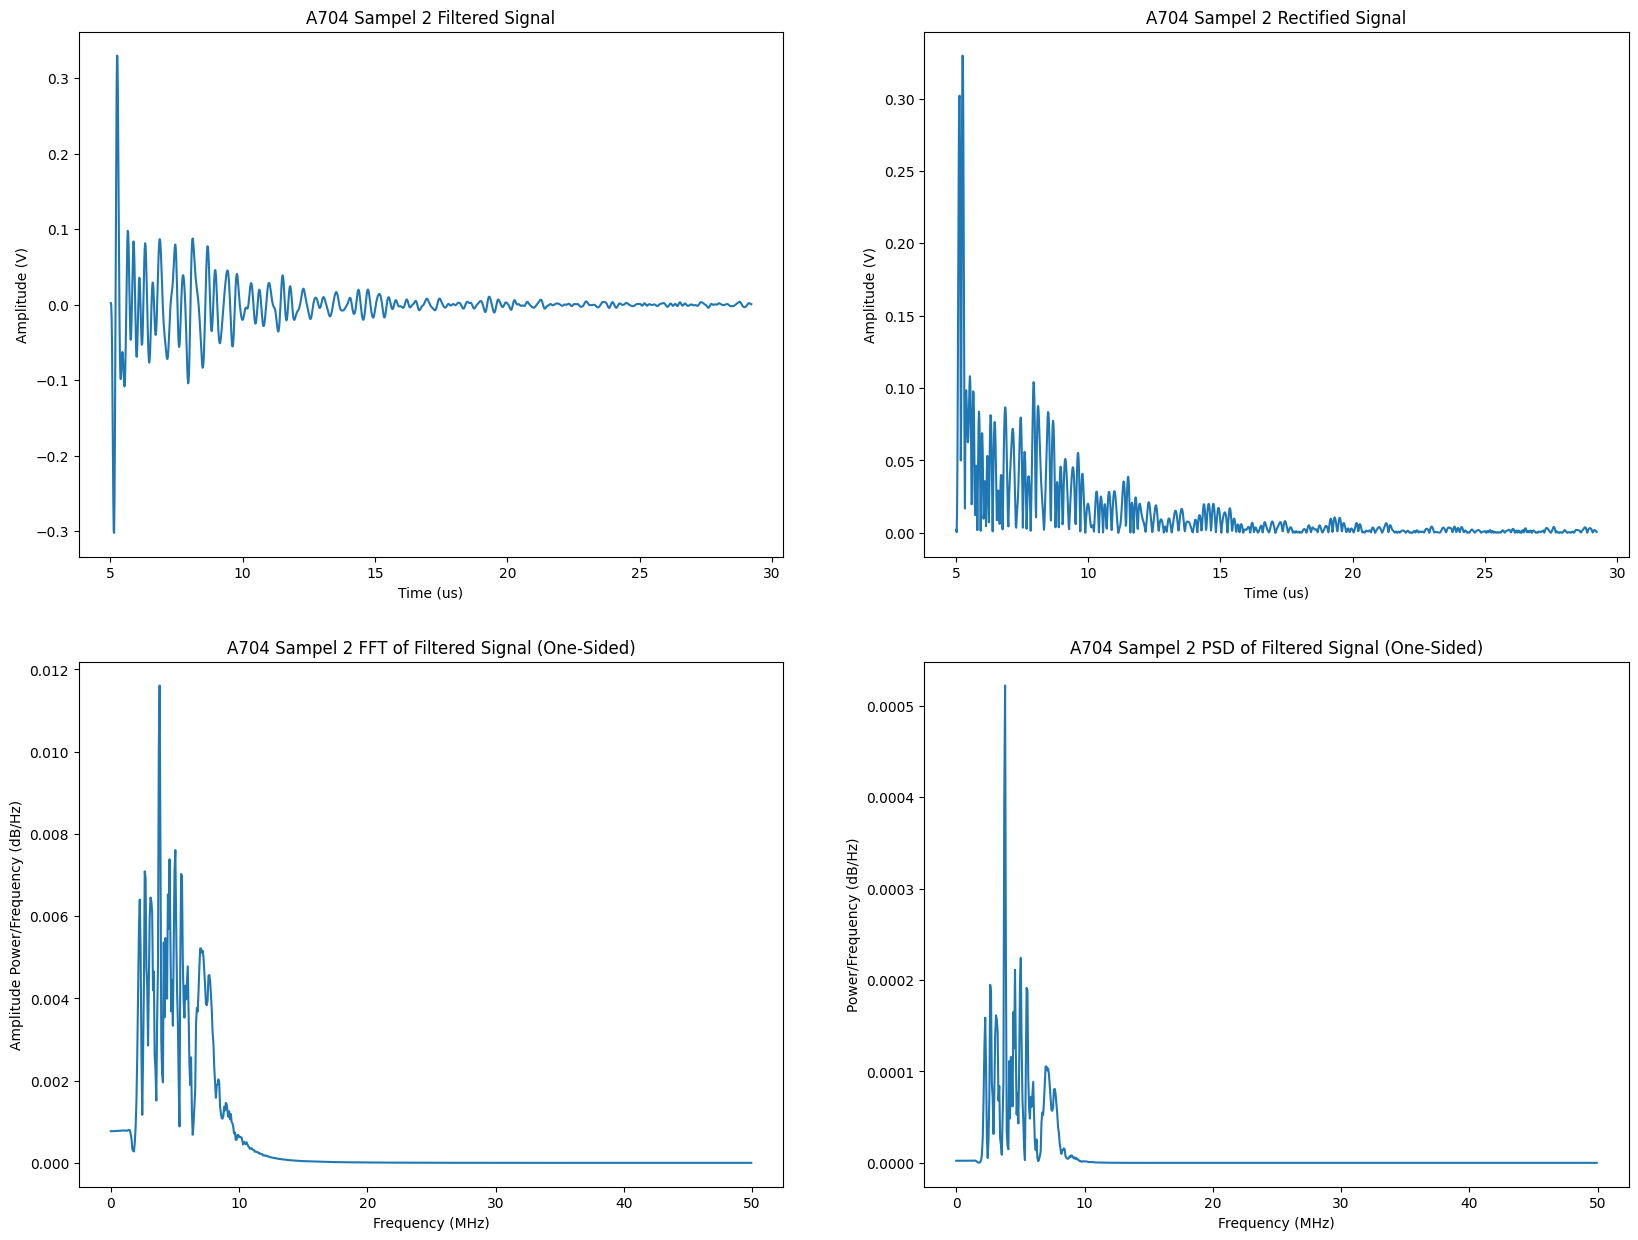

In [132]:
# A704
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x4, filtered_signal4)
axs[0, 0].set_title('A704 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x4, rectified_signal4)
axs[0, 1].set_title('A704 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq4, fft_amp4)
axs[1, 0].set_title('A704 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd4, psd_one_sided4)
axs[1, 1].set_title('A704 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

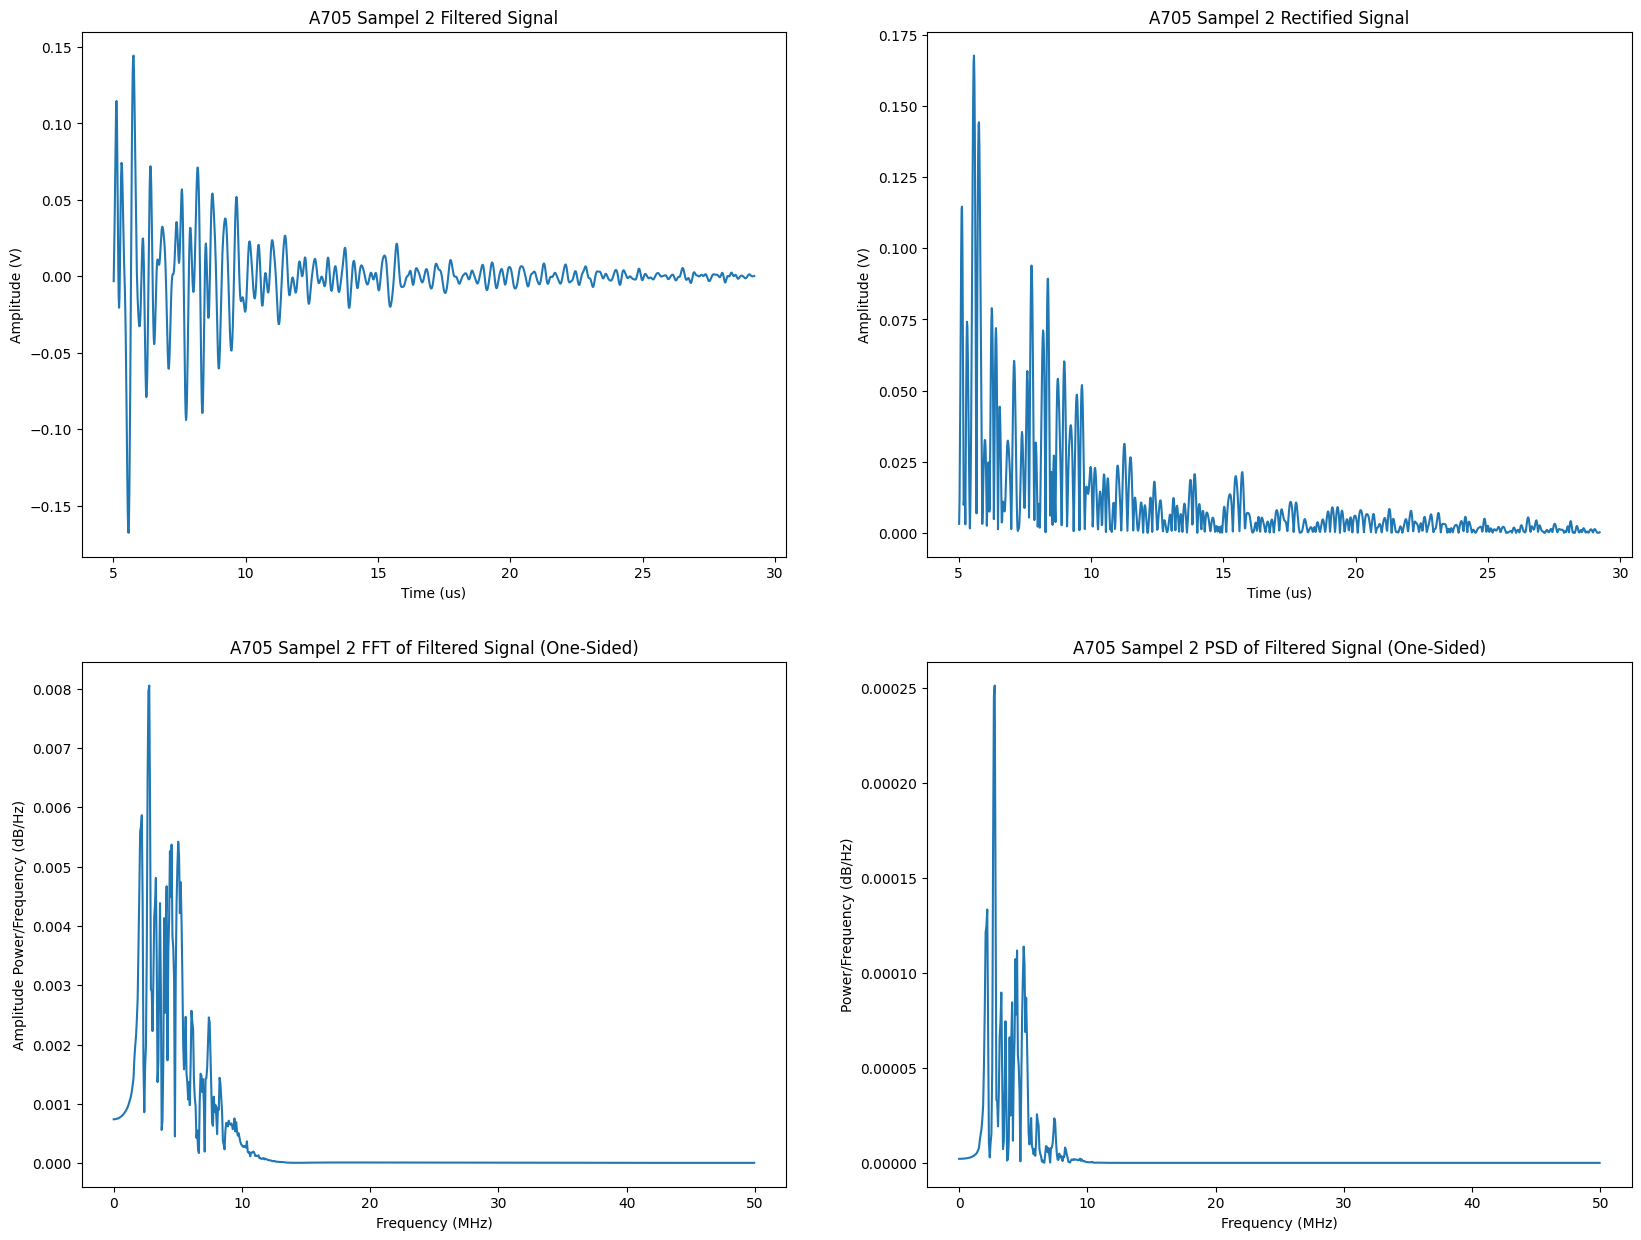

In [133]:
# A705
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x5, filtered_signal5)
axs[0, 0].set_title('A705 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x5, rectified_signal5)
axs[0, 1].set_title('A705 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq5, fft_amp5)
axs[1, 0].set_title('A705 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd5, psd_one_sided5)
axs[1, 1].set_title('A705 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

### Samping

In [134]:
# S701
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x6, filtered_signal6)
axs[0, 0].set_title('S701 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x6, rectified_signal6)
axs[0, 1].set_title('S701 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq6, fft_amp6)
axs[1, 0].set_title('S701 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd6, psd_one_sided6)
axs[1, 1].set_title('S701 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

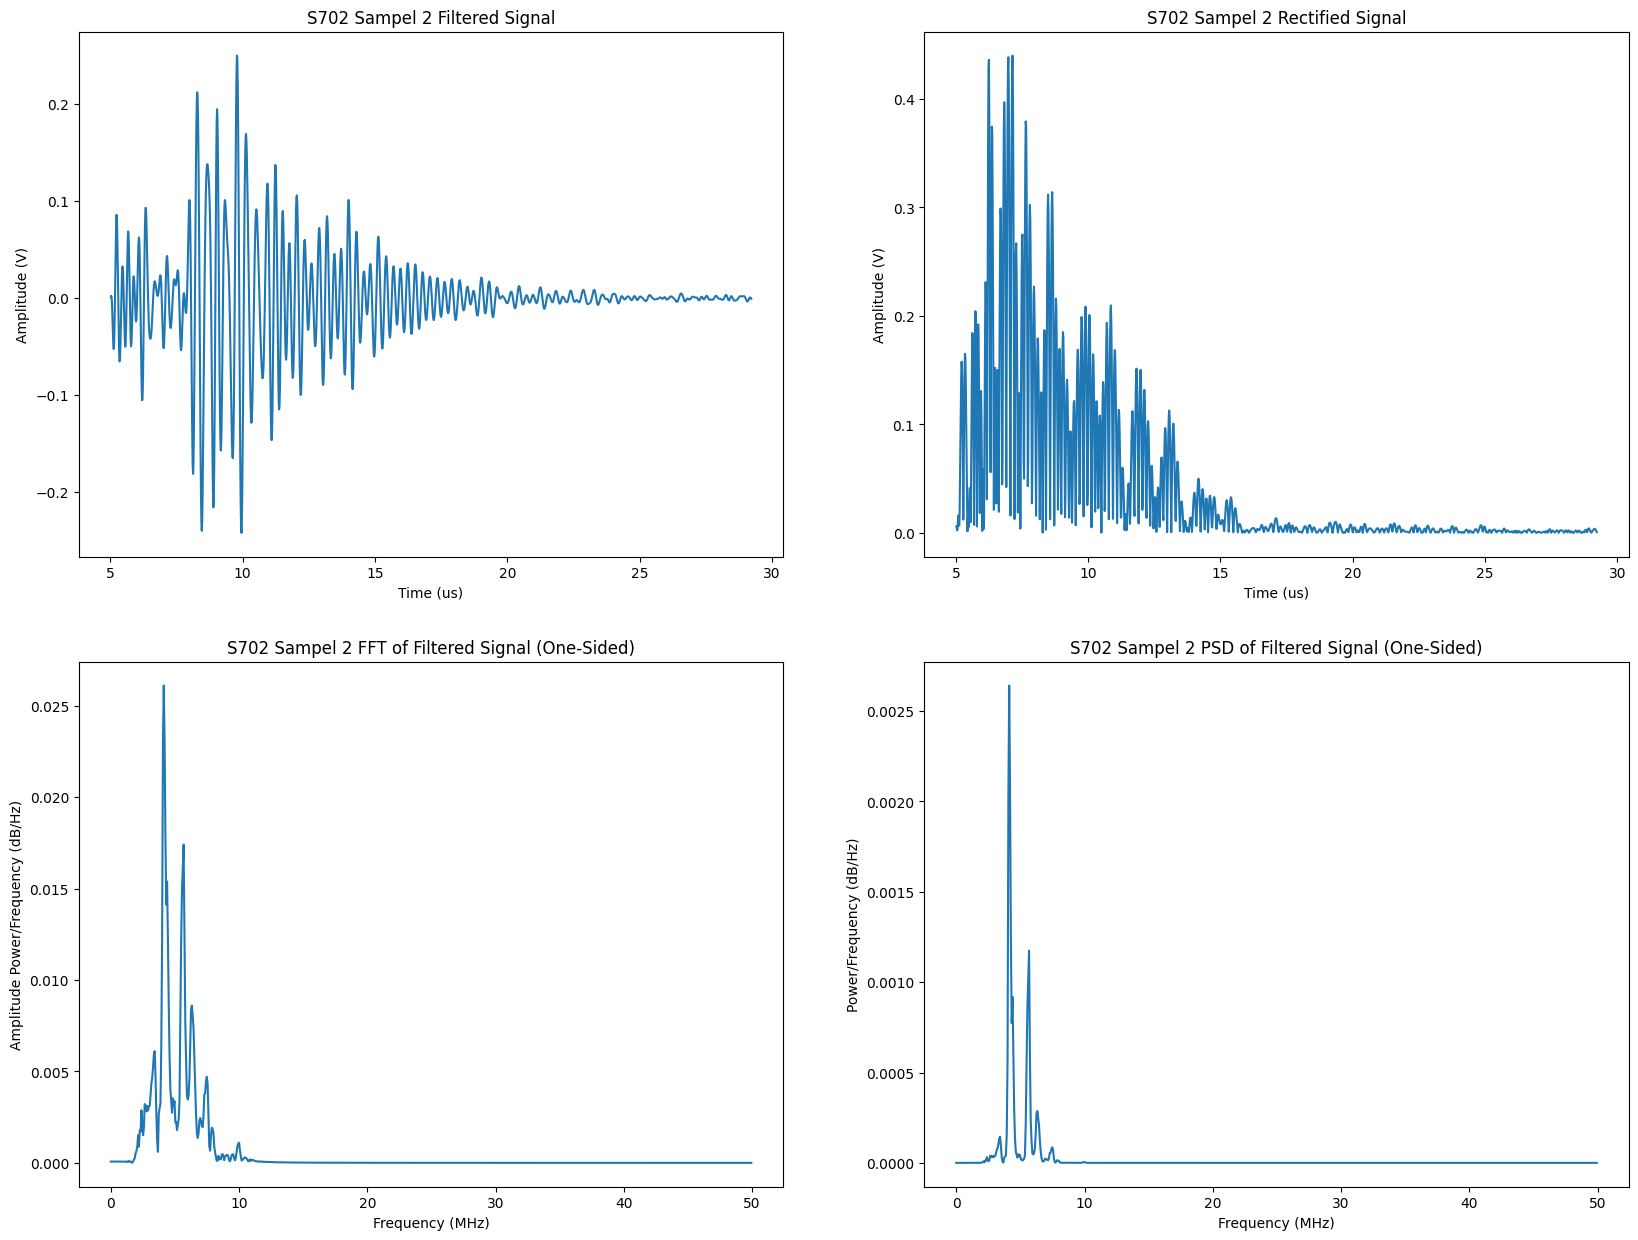

In [135]:
# S702
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x7, filtered_signal7)
axs[0, 0].set_title('S702 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x7, rectified_signal6)
axs[0, 1].set_title('S702 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq7, fft_amp7)
axs[1, 0].set_title('S702 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd7, psd_one_sided7)
axs[1, 1].set_title('S702 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

In [136]:
# S703
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x8, filtered_signal8)
axs[0, 0].set_title('S703 Sampel 3 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x8, rectified_signal8)
axs[0, 1].set_title('S703 Sampel 3 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq8, fft_amp8)
axs[1, 0].set_title('S703 Sampel 3 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd8, psd_one_sided8)
axs[1, 1].set_title('S703 Sampel 3 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

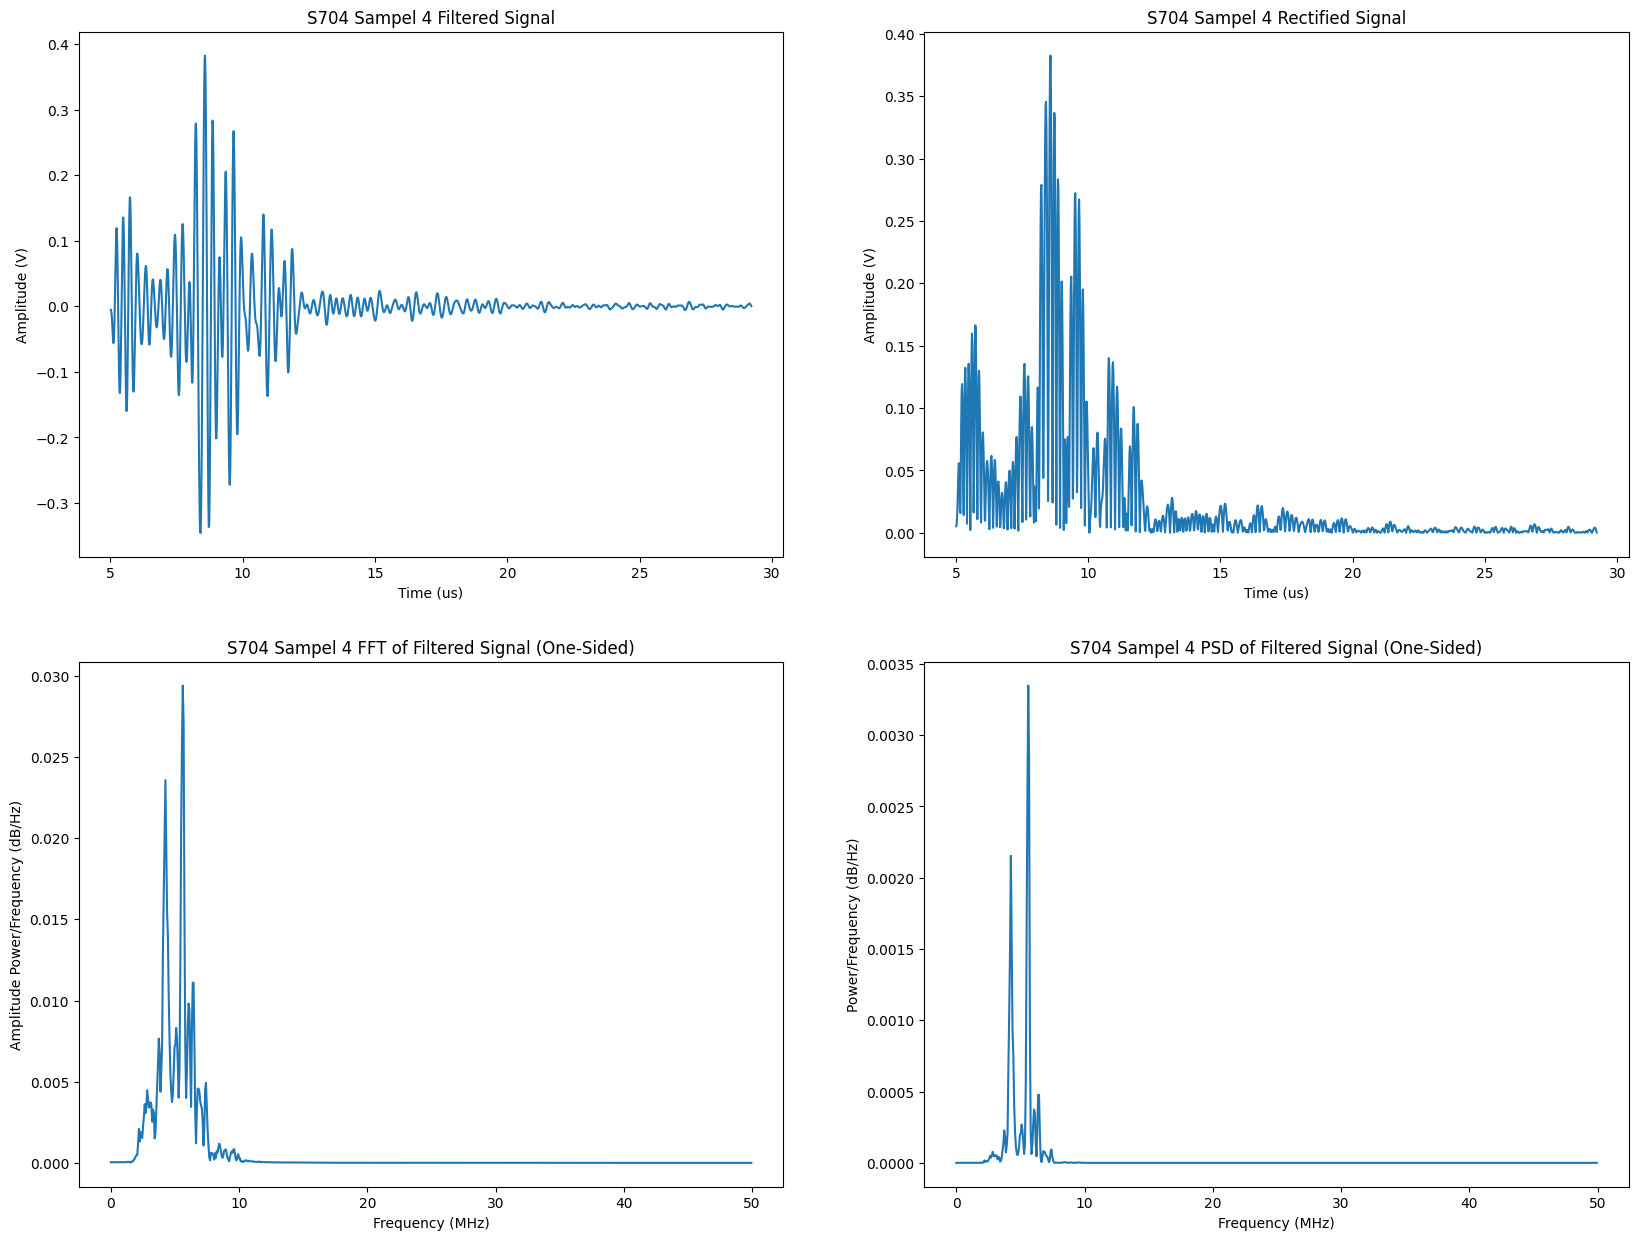

In [137]:
# S704
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x9, filtered_signal9)
axs[0, 0].set_title('S704 Sampel 4 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x9, rectified_signal9)
axs[0, 1].set_title('S704 Sampel 4 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq9, fft_amp9)
axs[1, 0].set_title('S704 Sampel 4 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd9, psd_one_sided9)
axs[1, 1].set_title('S704 Sampel 4 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

In [138]:
# S705
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x10, filtered_signal10)
axs[0, 0].set_title('S705 Sampel 5 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x10, rectified_signal10)
axs[0, 1].set_title('S705 Sampel 5 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq10, fft_amp10)
axs[1, 0].set_title('S705 Sampel 5 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd10, psd_one_sided10)
axs[1, 1].set_title('S705 Sampel 5 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

### Kecil

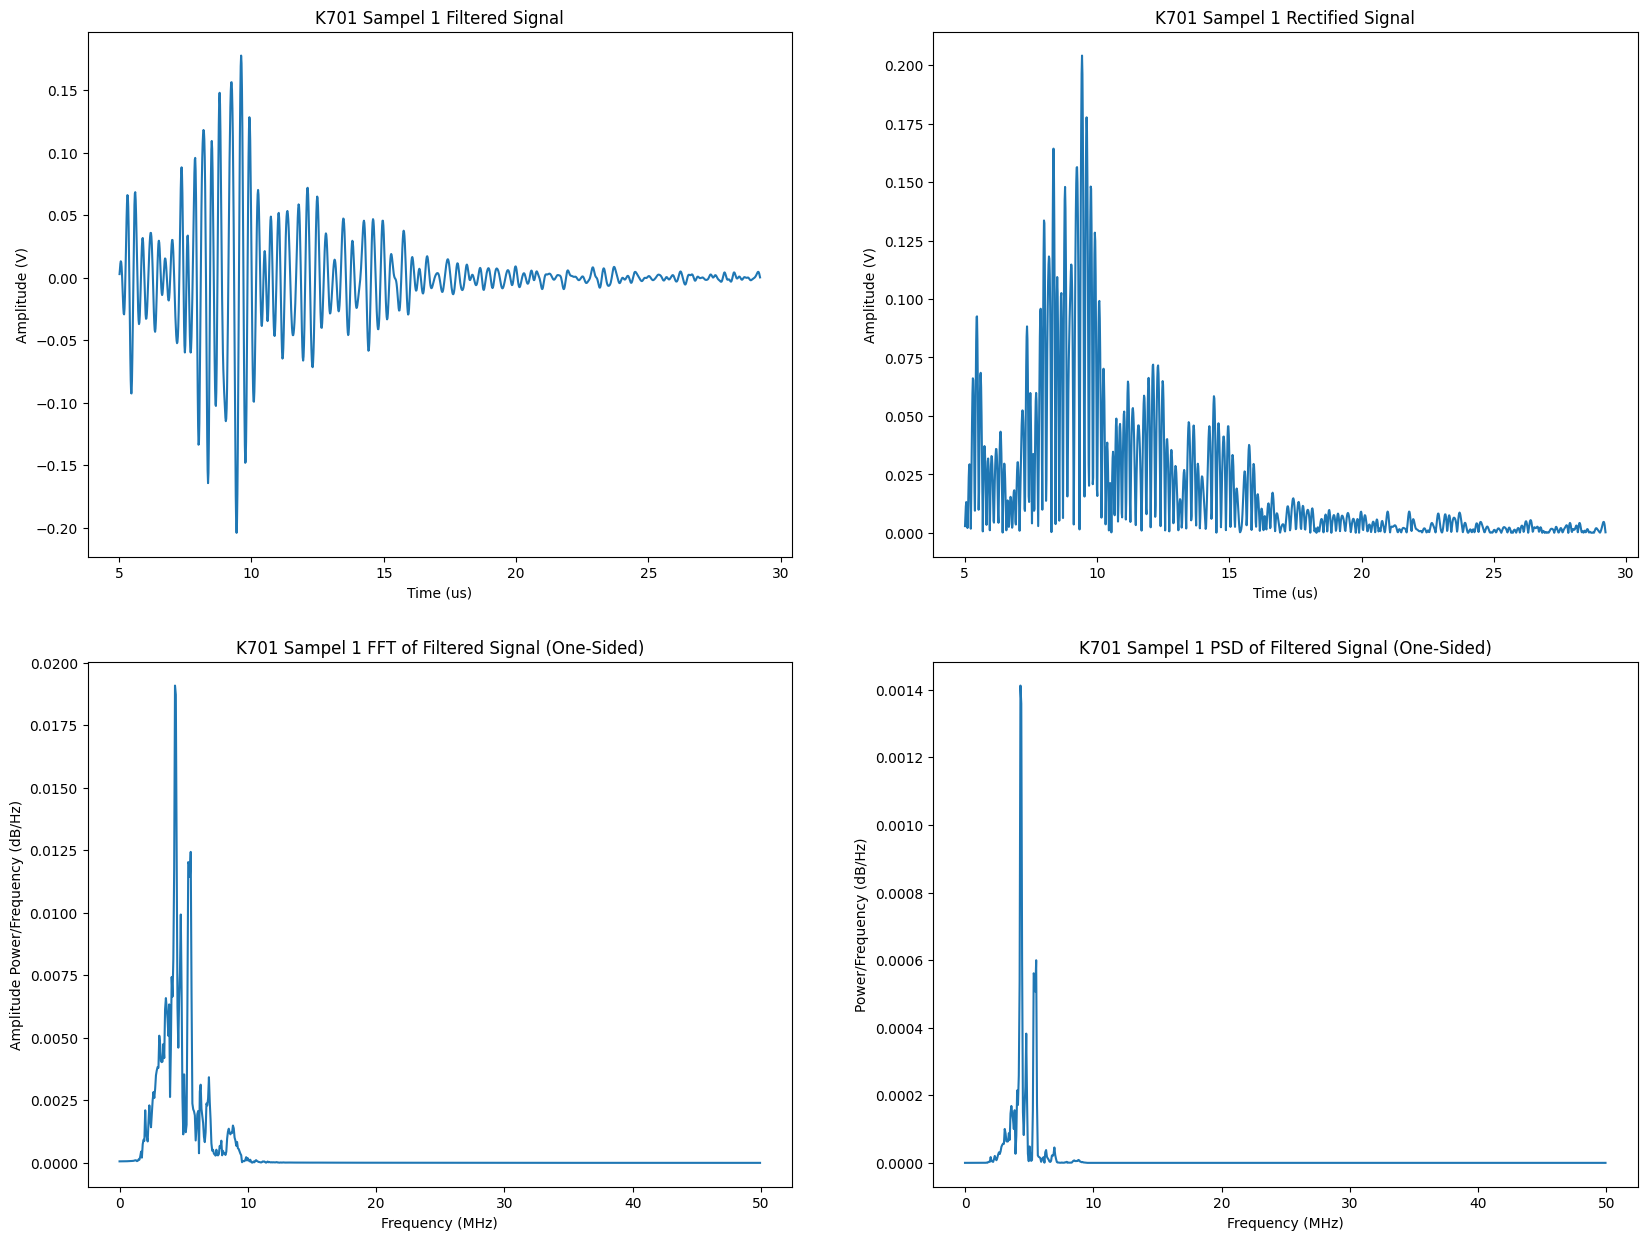

In [139]:
# K701
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x11, filtered_signal11)
axs[0, 0].set_title('K701 Sampel 1 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x11, rectified_signal11)
axs[0, 1].set_title('K701 Sampel 1 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq11, fft_amp11)
axs[1, 0].set_title('K701 Sampel 1 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd11, psd_one_sided11)
axs[1, 1].set_title('K701 Sampel 1 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

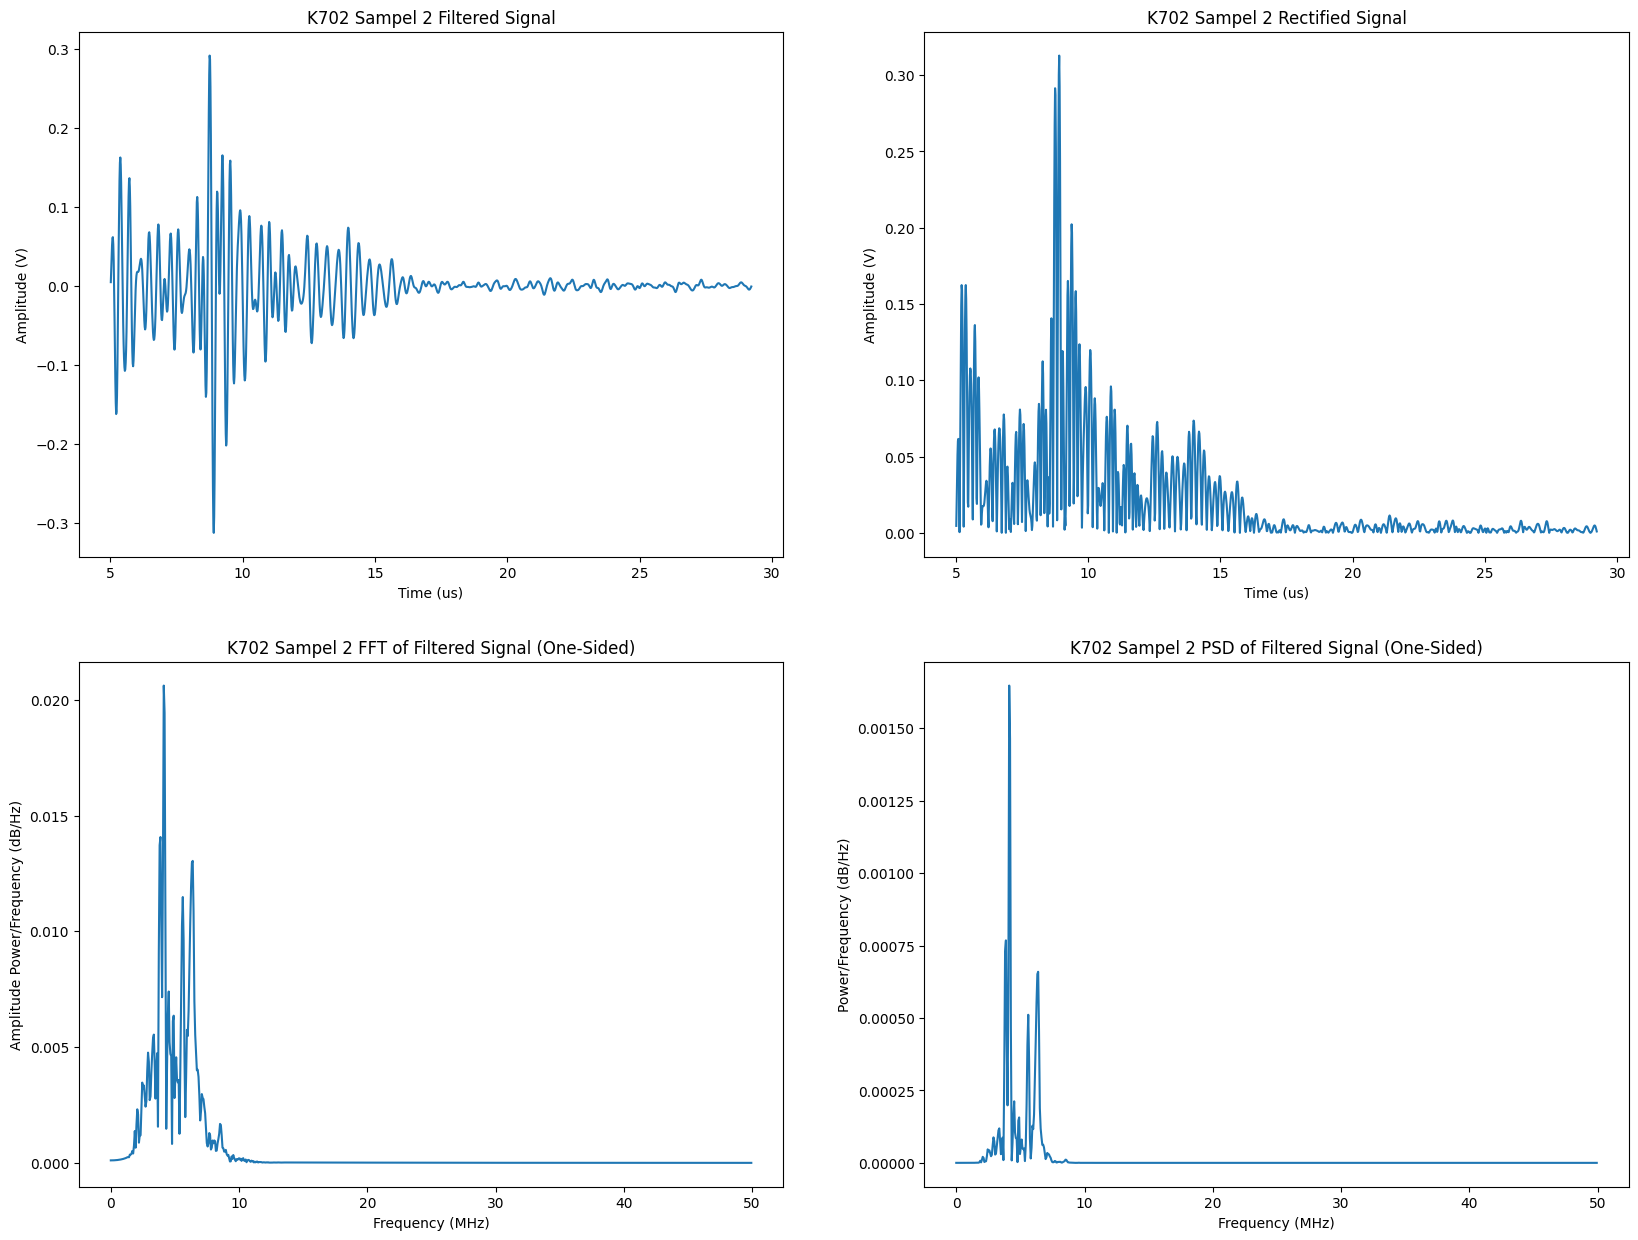

In [140]:
# K702
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x12, filtered_signal12)
axs[0, 0].set_title('K702 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x12, rectified_signal12)
axs[0, 1].set_title('K702 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq12, fft_amp12)
axs[1, 0].set_title('K702 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd12, psd_one_sided12)
axs[1, 1].set_title('K702 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

## Plot Filtered

### Atas

In [141]:
# A701
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, filtered_signal1)
plt.annotate(f'  Highest Peak: {filtered_signal1[highest_peak]:.6f}', 
             xy=(x1[highest_peak], 
                 filtered_signal1[highest_peak]),
             xytext=(x1[highest_peak]+1, filtered_signal1[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A701 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

In [142]:
# A702 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x2, filtered_signal2)
plt.annotate(f'  Highest Peak: {filtered_signal2[highest_peak]:.6f}', 
             xy=(x2[highest_peak], 
                 filtered_signal2[highest_peak]),
             xytext=(x2[highest_peak]+1, filtered_signal2[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A702 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

In [143]:
# A703 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x3, filtered_signal3)
plt.annotate(f'  Highest Peak: {filtered_signal3[highest_peak]:.6f}', 
             xy=(x3[highest_peak], 
                 filtered_signal3[highest_peak]),
             xytext=(x3[highest_peak]+1, filtered_signal3[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A703 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

In [144]:
# A704 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x4, filtered_signal4)
plt.annotate(f'  Highest Peak: {filtered_signal4[highest_peak]:.6f}', 
             xy=(x4[highest_peak], 
                 filtered_signal4[highest_peak]),
             xytext=(x4[highest_peak]+1, filtered_signal4[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A704 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

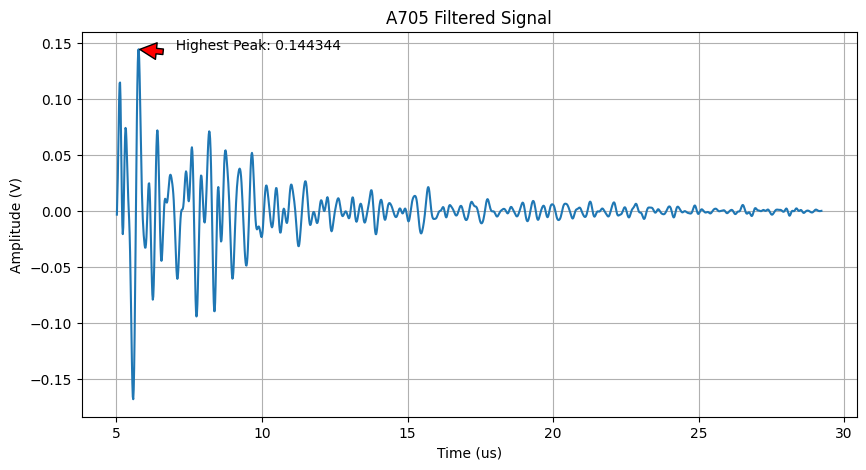

In [145]:
# A705 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x5, filtered_signal5)
plt.annotate(f'  Highest Peak: {filtered_signal5[highest_peak]:.6f}', 
             xy=(x5[highest_peak], 
                 filtered_signal5[highest_peak]),
             xytext=(x5[highest_peak]+1, filtered_signal5[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A705 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

### Samping

Text(0, 0.5, 'Amplitude (V)')

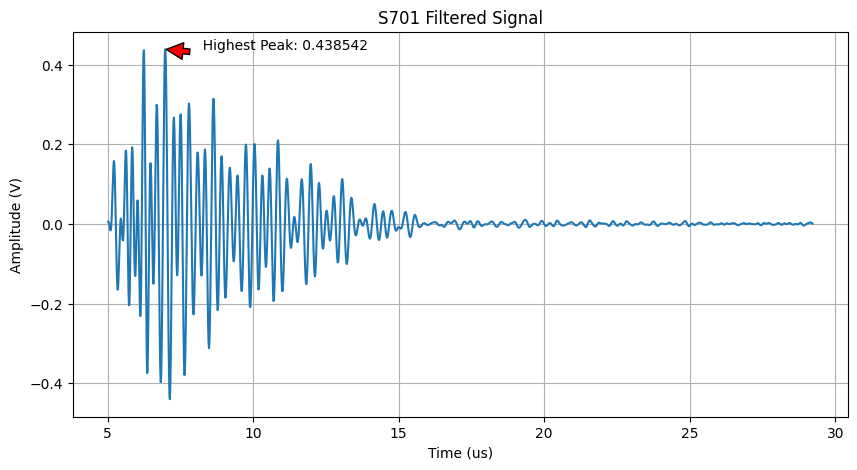

In [146]:
# S701 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x6, filtered_signal6)
plt.annotate(f'  Highest Peak: {filtered_signal6[highest_peak]:.6f}', 
             xy=(x6[highest_peak], 
                 filtered_signal6[highest_peak]),
             xytext=(x6[highest_peak]+1, filtered_signal6[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S701 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

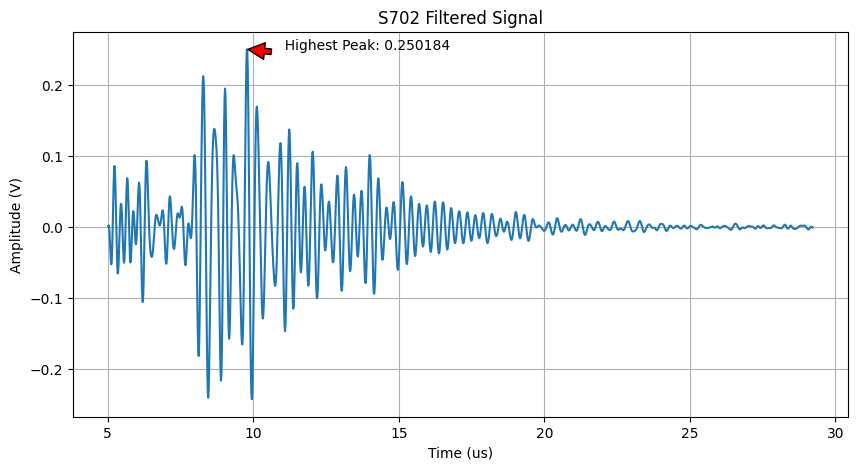

In [147]:
# S702 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x7, filtered_signal7)
plt.annotate(f'  Highest Peak: {filtered_signal7[highest_peak]:.6f}', 
             xy=(x7[highest_peak], 
                 filtered_signal7[highest_peak]),
             xytext=(x7[highest_peak]+1, filtered_signal7[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S702 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

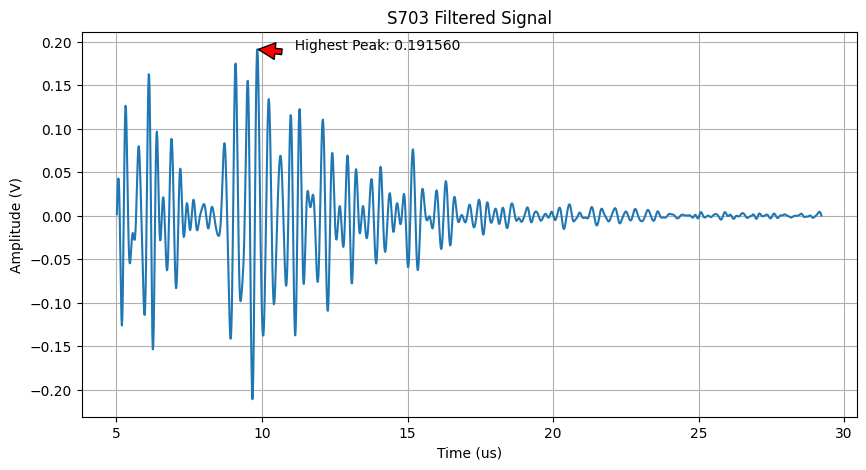

In [148]:
# S703 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x8, filtered_signal8)
plt.annotate(f'  Highest Peak: {filtered_signal8[highest_peak]:.6f}', 
             xy=(x8[highest_peak], 
                 filtered_signal8[highest_peak]),
             xytext=(x8[highest_peak]+1, filtered_signal8[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S703 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

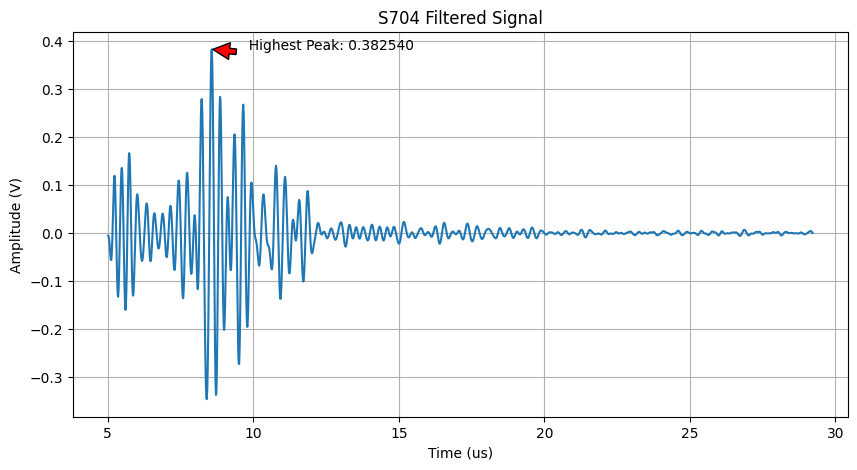

In [149]:
# S704 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x9, filtered_signal9)
plt.annotate(f'  Highest Peak: {filtered_signal9[highest_peak]:.6f}', 
             xy=(x9[highest_peak], 
                 filtered_signal9[highest_peak]),
             xytext=(x9[highest_peak]+1, filtered_signal9[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S704 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

In [150]:
# S705 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x10, filtered_signal10)
plt.annotate(f'  Highest Peak: {filtered_signal10[highest_peak]:.6f}', 
             xy=(x10[highest_peak], 
                 filtered_signal10[highest_peak]),
             xytext=(x10[highest_peak]+1, filtered_signal10[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S705 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

### Kecil

Text(0, 0.5, 'Amplitude (V)')

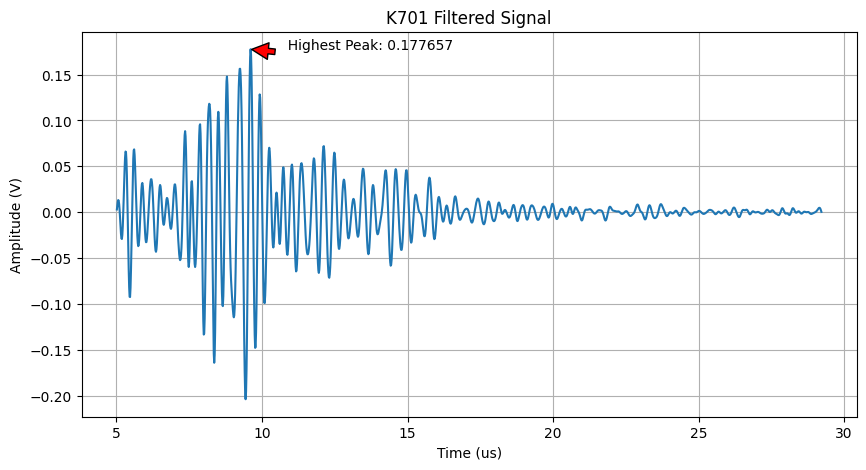

In [151]:
# K701 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x11, filtered_signal11)
plt.annotate(f'  Highest Peak: {filtered_signal11[highest_peak]:.6f}', 
             xy=(x11[highest_peak], 
                 filtered_signal11[highest_peak]),
             xytext=(x11[highest_peak]+1, filtered_signal11[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('K701 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

In [152]:
# K702 Filtered Signal
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x12, filtered_signal12)
plt.annotate(f'  Highest Peak: {filtered_signal12[highest_peak]:.6f}', 
             xy=(x12[highest_peak], 
                 filtered_signal12[highest_peak]),
             xytext=(x12[highest_peak]+1, filtered_signal12[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('K702 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

## Plot Rectified

### Atas

In [153]:
# A701 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, rectified_signal1)
plt.annotate(f'  Highest Peak: {rectified_signal1[highest_peak]:.6f}', 
             xy=(x1[highest_peak], 
                 rectified_signal1[highest_peak]),
             xytext=(x1[highest_peak]+1, rectified_signal1[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A701 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

In [154]:
# A702 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x2, rectified_signal2)
plt.annotate(f'  Highest Peak: {rectified_signal2[highest_peak]:.6f}', 
             xy=(x2[highest_peak], 
                 rectified_signal2[highest_peak]),
             xytext=(x2[highest_peak]+1, rectified_signal2[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A702 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

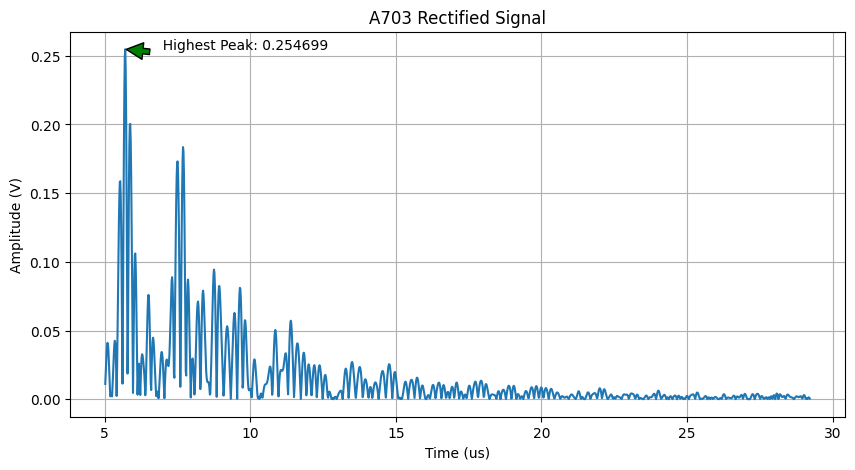

In [155]:
# A703 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x3, rectified_signal3)
plt.annotate(f'  Highest Peak: {rectified_signal3[highest_peak]:.6f}', 
             xy=(x3[highest_peak], 
                 rectified_signal3[highest_peak]),
             xytext=(x3[highest_peak]+1, rectified_signal3[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A703 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

In [156]:
# A704 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x4, rectified_signal4)
plt.annotate(f'  Highest Peak: {rectified_signal4[highest_peak]:.6f}', 
             xy=(x4[highest_peak], 
                 rectified_signal4[highest_peak]),
             xytext=(x4[highest_peak]+1, rectified_signal4[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A704 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

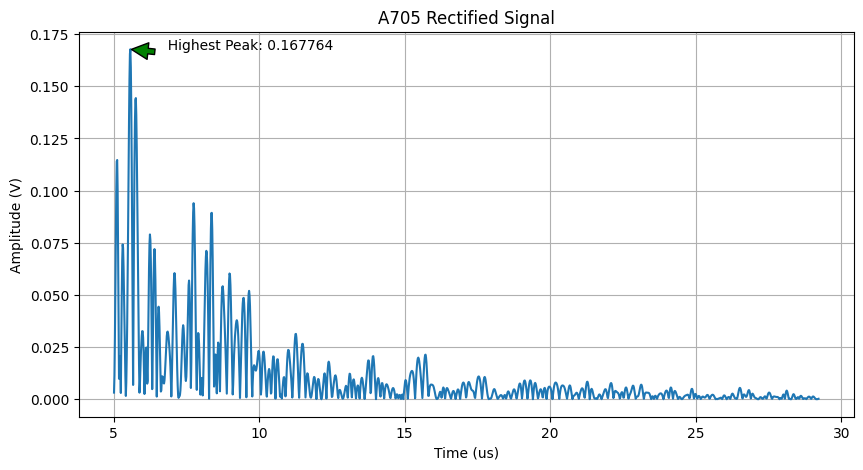

In [157]:
# A705 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x5, rectified_signal5)
plt.annotate(f'  Highest Peak: {rectified_signal5[highest_peak]:.6f}', 
             xy=(x5[highest_peak], 
                 rectified_signal5[highest_peak]),
             xytext=(x5[highest_peak]+1, rectified_signal5[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A705 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

### Samping

Text(0, 0.5, 'Amplitude (V)')

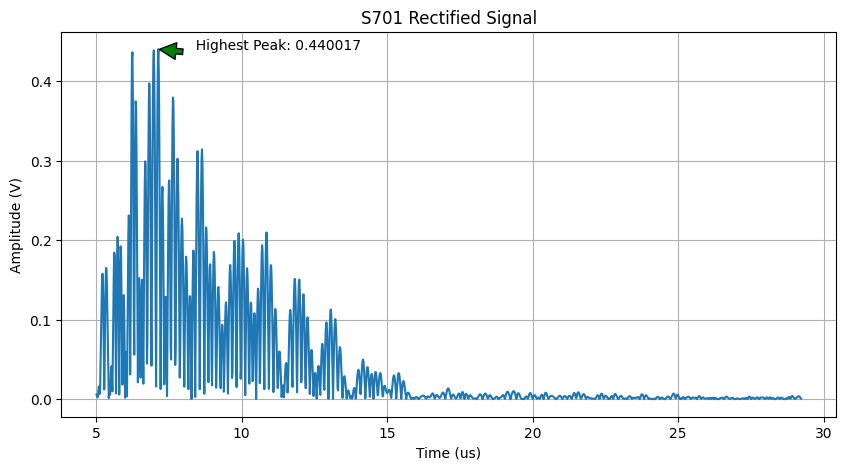

In [158]:
# S701 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x6, rectified_signal6)
plt.annotate(f'  Highest Peak: {rectified_signal6[highest_peak]:.6f}', 
             xy=(x6[highest_peak], 
                 rectified_signal6[highest_peak]),
             xytext=(x6[highest_peak]+1, rectified_signal6[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S701 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

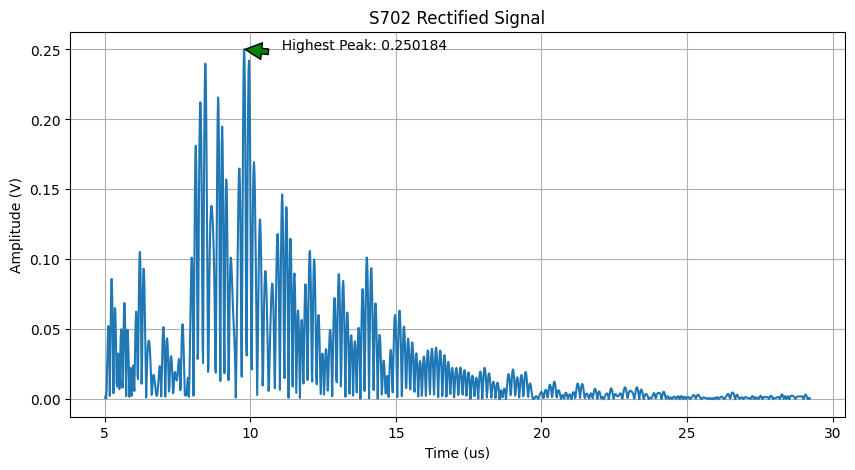

In [159]:
# S702 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x7, rectified_signal7)
plt.annotate(f'  Highest Peak: {rectified_signal7[highest_peak]:.6f}', 
             xy=(x7[highest_peak], 
                 rectified_signal7[highest_peak]),
             xytext=(x7[highest_peak]+1, rectified_signal7[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S702 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

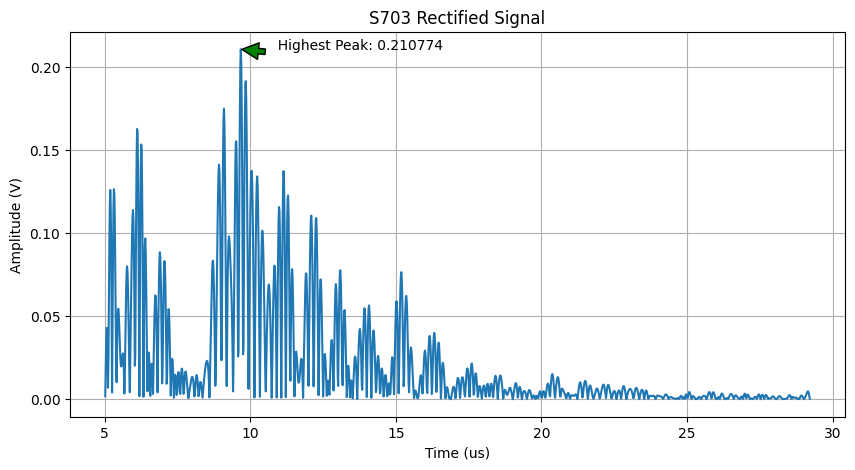

In [160]:
# S703 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x8, rectified_signal8)
plt.annotate(f'  Highest Peak: {rectified_signal8[highest_peak]:.6f}', 
             xy=(x8[highest_peak], 
                 rectified_signal8[highest_peak]),
             xytext=(x8[highest_peak]+1, rectified_signal8[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S703 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

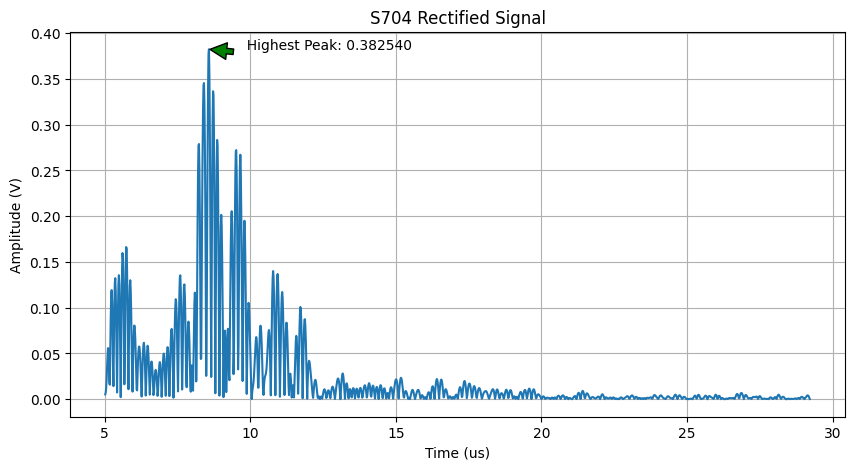

In [161]:
# S704 Rectified Signa
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x9, rectified_signal9)
plt.annotate(f'  Highest Peak: {rectified_signal9[highest_peak]:.6f}', 
             xy=(x9[highest_peak], 
                 rectified_signal9[highest_peak]),
             xytext=(x9[highest_peak]+1, rectified_signal9[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S704 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

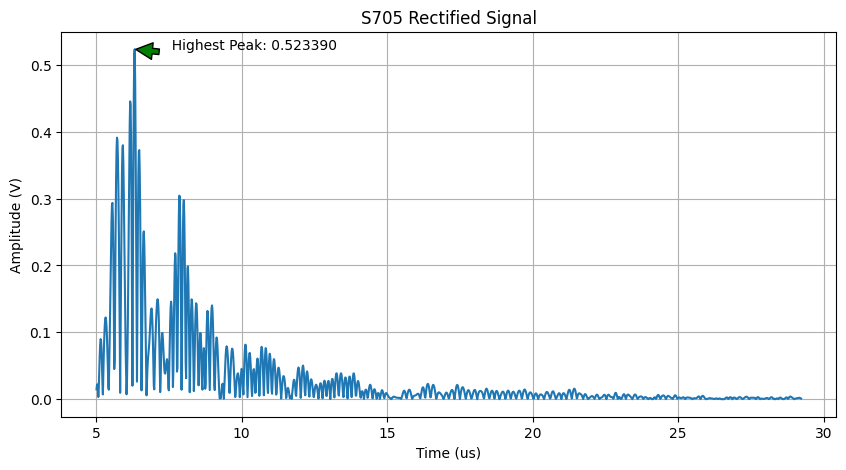

In [162]:
# S705 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x10, rectified_signal10)
plt.annotate(f'  Highest Peak: {rectified_signal10[highest_peak]:.6f}', 
             xy=(x10[highest_peak], 
                 rectified_signal10[highest_peak]),
             xytext=(x10[highest_peak]+1, rectified_signal10[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S705 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

### Kecil

In [163]:
# K701 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x11, rectified_signal11)
plt.annotate(f'  Highest Peak: {rectified_signal11[highest_peak]:.6f}', 
             xy=(x11[highest_peak], 
                 rectified_signal11[highest_peak]),
             xytext=(x11[highest_peak]+1, rectified_signal11[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('K701 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

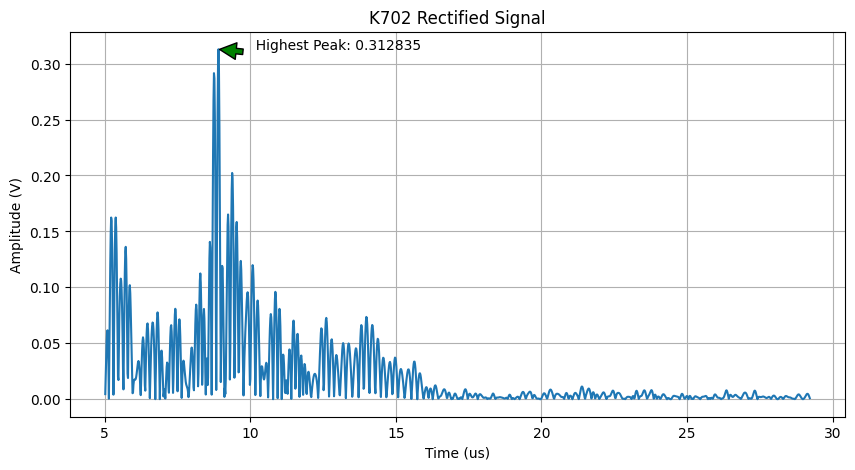

In [164]:
# K702 Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x12, rectified_signal12)
plt.annotate(f'  Highest Peak: {rectified_signal12[highest_peak]:.6f}', 
             xy=(x12[highest_peak], 
                 rectified_signal12[highest_peak]),
             xytext=(x12[highest_peak]+1, rectified_signal12[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('K702 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

## Plot FFT of Filtered Signal

### Atas

Text(0, 0.5, 'Amplitude (dB/Hz)')

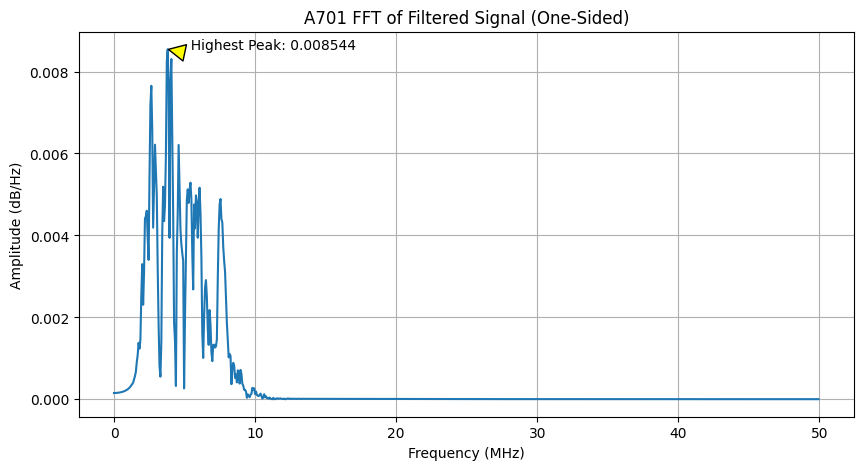

In [165]:
# A701 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq1, fft_amp1)
plt.annotate(f'  Highest Peak: {fft_amp1[highest_peak]:.6f}', 
             xy=(freq1[highest_peak], 
                 fft_amp1[highest_peak]),
             xytext=(freq1[highest_peak]+1, fft_amp1[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A701 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

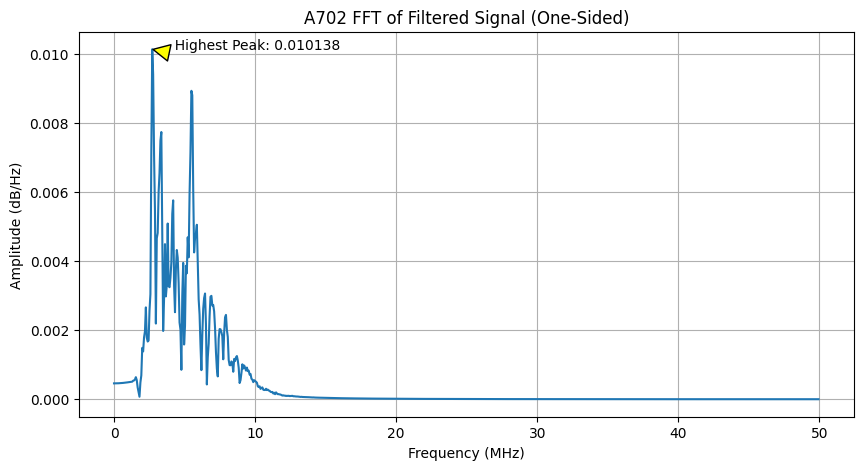

In [166]:
# A702 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq2, fft_amp2)
plt.annotate(f'  Highest Peak: {fft_amp2[highest_peak]:.6f}', 
             xy=(freq2[highest_peak], 
                 fft_amp2[highest_peak]),
             xytext=(freq2[highest_peak]+1, fft_amp2[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A702 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

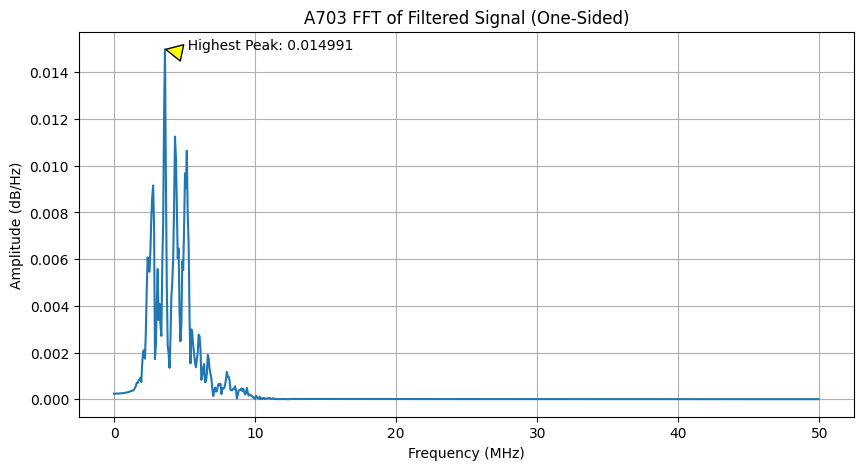

In [167]:
# A703 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq3, fft_amp3)
plt.annotate(f'  Highest Peak: {fft_amp3[highest_peak]:.6f}', 
             xy=(freq3[highest_peak], 
                 fft_amp3[highest_peak]),
             xytext=(freq3[highest_peak]+1, fft_amp3[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A703 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

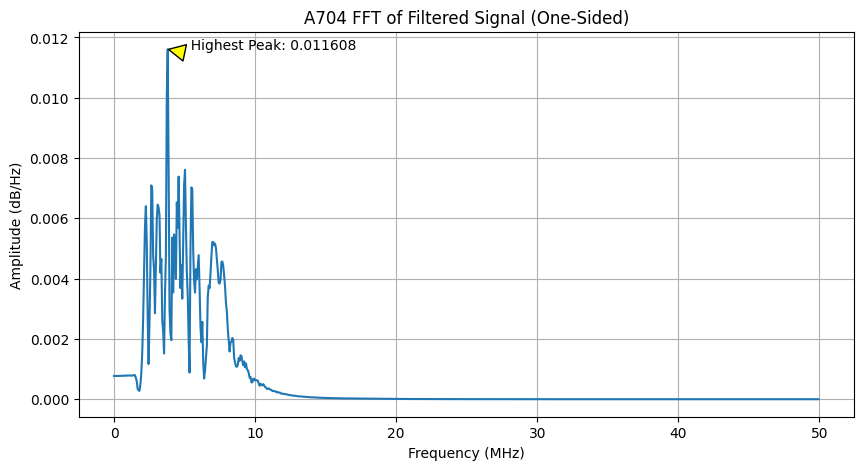

In [168]:
# A704 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq4, fft_amp4)
plt.annotate(f'  Highest Peak: {fft_amp4[highest_peak]:.6f}', 
             xy=(freq4[highest_peak], 
                 fft_amp4[highest_peak]),
             xytext=(freq4[highest_peak]+1, fft_amp4[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A704 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

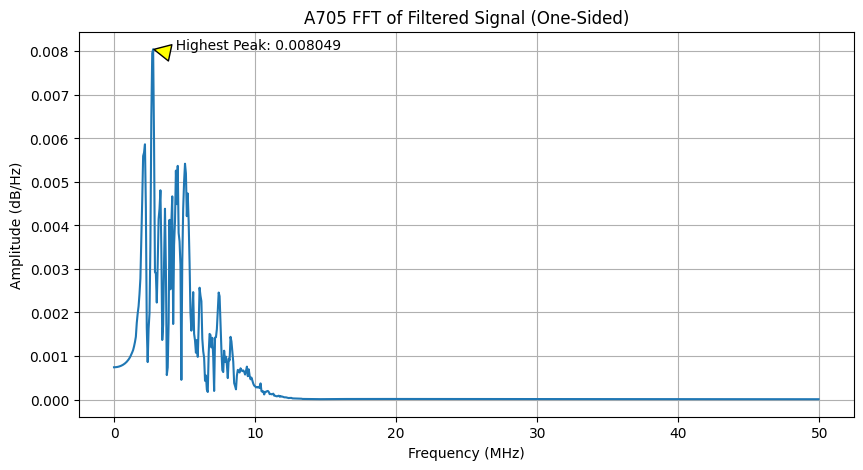

In [169]:
# A705 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq5, fft_amp5)
plt.annotate(f'  Highest Peak: {fft_amp5[highest_peak]:.6f}', 
             xy=(freq5[highest_peak], 
                 fft_amp5[highest_peak]),
             xytext=(freq5[highest_peak]+1, fft_amp5[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A705 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

### Samping

Text(0, 0.5, 'Amplitude (dB/Hz)')

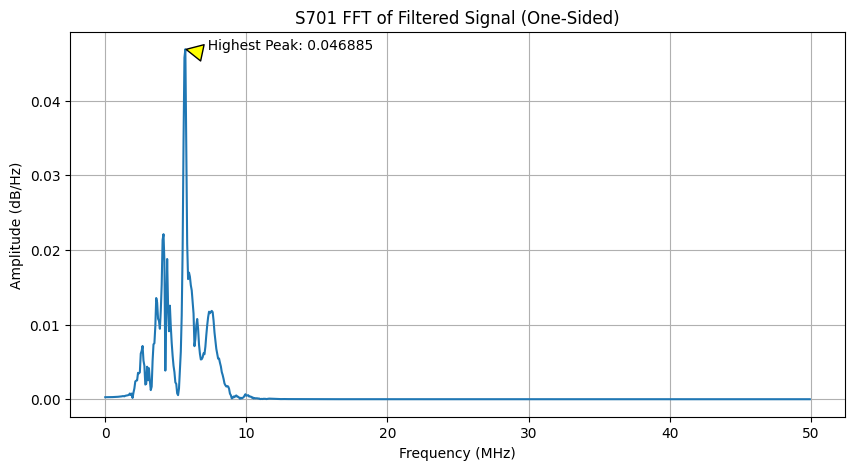

In [170]:
# S701 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq6, fft_amp6)
plt.annotate(f'  Highest Peak: {fft_amp6[highest_peak]:.6f}', 
             xy=(freq6[highest_peak], 
                 fft_amp6[highest_peak]),
             xytext=(freq6[highest_peak]+1, fft_amp6[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S701 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

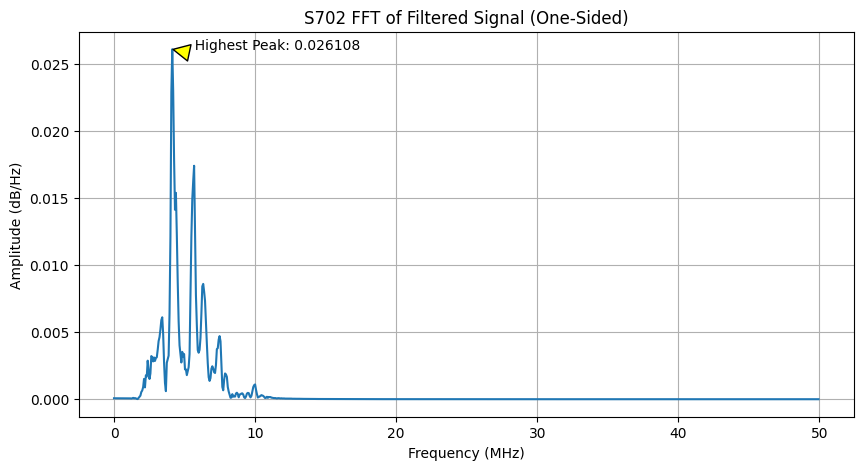

In [171]:
# S702 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq7, fft_amp7)
plt.annotate(f'  Highest Peak: {fft_amp7[highest_peak]:.6f}', 
             xy=(freq7[highest_peak], 
                 fft_amp7[highest_peak]),
             xytext=(freq7[highest_peak]+1, fft_amp7[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S702 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

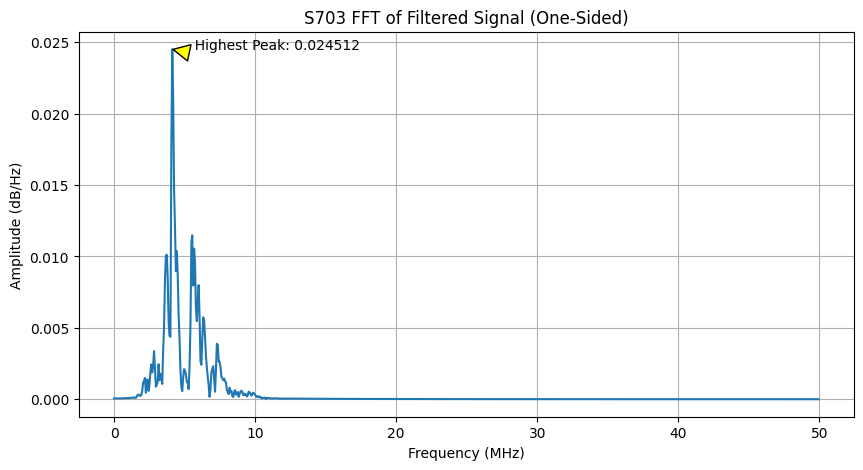

In [172]:
# S703 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq8, fft_amp8)
plt.annotate(f'  Highest Peak: {fft_amp8[highest_peak]:.6f}', 
             xy=(freq8[highest_peak], 
                 fft_amp8[highest_peak]),
             xytext=(freq8[highest_peak]+1, fft_amp8[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S703 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

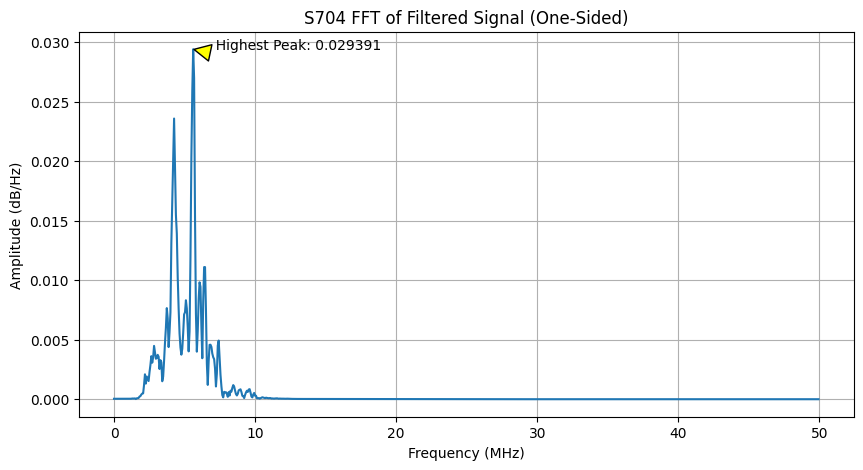

In [173]:
# S704 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq9, fft_amp9)
plt.annotate(f'  Highest Peak: {fft_amp9[highest_peak]:.6f}', 
             xy=(freq9[highest_peak], 
                 fft_amp9[highest_peak]),
             xytext=(freq9[highest_peak]+1, fft_amp9[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S704 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

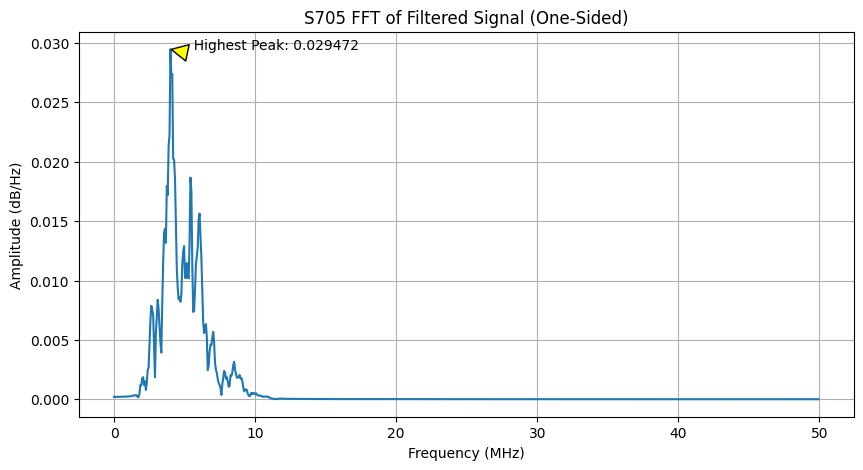

In [174]:
# S705 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq10, fft_amp10)
plt.annotate(f'  Highest Peak: {fft_amp10[highest_peak]:.6f}', 
             xy=(freq10[highest_peak], 
                 fft_amp10[highest_peak]),
             xytext=(freq10[highest_peak]+1, fft_amp10[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S705 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

### Kecil

Text(0, 0.5, 'Amplitude (dB/Hz)')

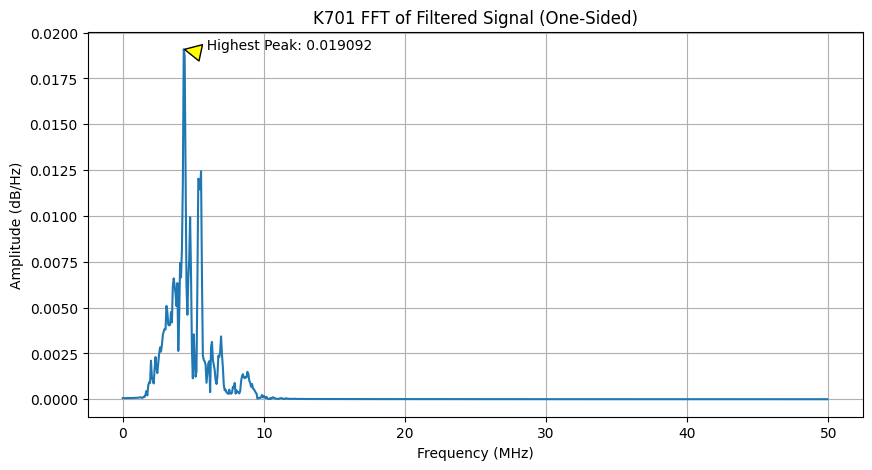

In [175]:
# K701 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq11, fft_amp11)
plt.annotate(f'  Highest Peak: {fft_amp11[highest_peak]:.6f}', 
             xy=(freq11[highest_peak], 
                 fft_amp11[highest_peak]),
             xytext=(freq11[highest_peak]+1, fft_amp11[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('K701 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

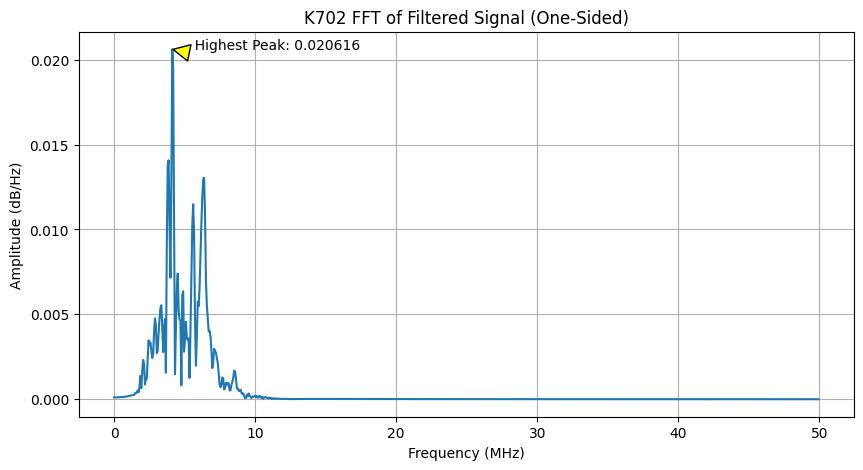

In [176]:
# K702 FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq12, fft_amp12)
plt.annotate(f'  Highest Peak: {fft_amp12[highest_peak]:.6f}', 
             xy=(freq12[highest_peak], 
                 fft_amp12[highest_peak]),
             xytext=(freq12[highest_peak]+1, fft_amp12[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('K702 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

## Plot PSD of Filtered Signal

### Atas

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

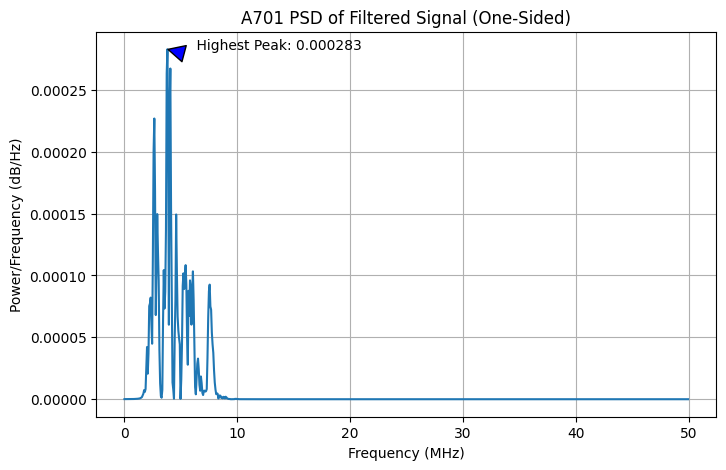

In [177]:
# A701 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd1, psd_one_sided1)
plt.annotate(f'    Highest Peak: {psd_one_sided1[highest_peak]:.6f}', 
             xy=(freq_psd1[highest_peak], 
                 psd_one_sided1[highest_peak]),
             xytext=(freq_psd1[highest_peak]+1, psd_one_sided1[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A701 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

In [178]:
# A702 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd2, psd_one_sided2)
plt.annotate(f'    Highest Peak: {psd_one_sided2[highest_peak]:.6f}', 
             xy=(freq_psd2[highest_peak], 
                 psd_one_sided2[highest_peak]),
             xytext=(freq_psd2[highest_peak]+1, psd_one_sided2[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A702 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

In [179]:
# A703 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd3, psd_one_sided3)
plt.annotate(f'    Highest Peak: {psd_one_sided3[highest_peak]:.6f}', 
             xy=(freq_psd3[highest_peak], 
                 psd_one_sided3[highest_peak]),
             xytext=(freq_psd3[highest_peak]+1, psd_one_sided3[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A703 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

In [180]:
# A704 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd4, psd_one_sided4)
plt.annotate(f'    Highest Peak: {psd_one_sided4[highest_peak]:.6f}', 
             xy=(freq_psd4[highest_peak], 
                 psd_one_sided4[highest_peak]),
             xytext=(freq_psd4[highest_peak]+1, psd_one_sided4[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A704 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

In [181]:
# A705 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd5, psd_one_sided5)
plt.annotate(f'    Highest Peak: {psd_one_sided5[highest_peak]:.6f}', 
             xy=(freq_psd5[highest_peak], 
                 psd_one_sided5[highest_peak]),
             xytext=(freq_psd5[highest_peak]+1, psd_one_sided5[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A705 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

### Samping

In [182]:
# S701 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd6, psd_one_sided6)
plt.annotate(f'    Highest Peak: {psd_one_sided6[highest_peak]:.6f}', 
             xy=(freq_psd6[highest_peak], 
                 psd_one_sided6[highest_peak]),
             xytext=(freq_psd6[highest_peak]+1, psd_one_sided6[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S701 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

In [183]:
# S702 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd7, psd_one_sided7)
plt.annotate(f'    Highest Peak: {psd_one_sided7[highest_peak]:.6f}', 
             xy=(freq_psd7[highest_peak], 
                 psd_one_sided7[highest_peak]),
             xytext=(freq_psd7[highest_peak]+1, psd_one_sided7[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S702 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

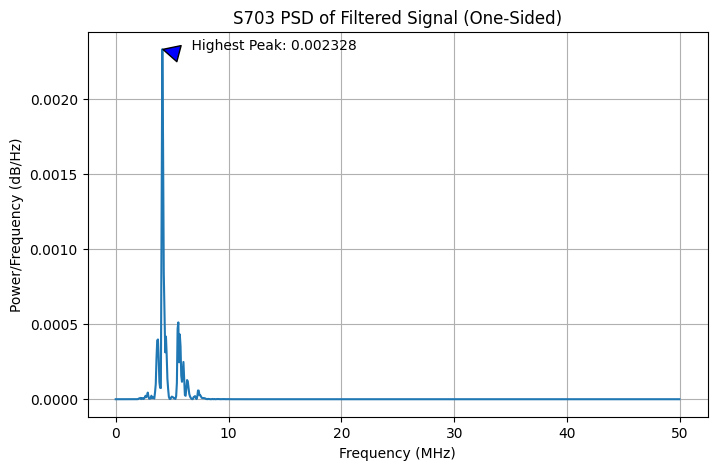

In [184]:
# S703 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd8, psd_one_sided8)
plt.annotate(f'    Highest Peak: {psd_one_sided8[highest_peak]:.6f}', 
             xy=(freq_psd8[highest_peak], 
                 psd_one_sided8[highest_peak]),
             xytext=(freq_psd8[highest_peak]+1, psd_one_sided8[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S703 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

In [185]:
# S704 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd9, psd_one_sided9)
plt.annotate(f'    Highest Peak: {psd_one_sided9[highest_peak]:.6f}', 
             xy=(freq_psd9[highest_peak], 
                 psd_one_sided9[highest_peak]),
             xytext=(freq_psd9[highest_peak]+1, psd_one_sided9[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S704 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

In [186]:
# S705 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd10, psd_one_sided10)
plt.annotate(f'    Highest Peak: {psd_one_sided10[highest_peak]:.6f}', 
             xy=(freq_psd10[highest_peak], 
                 psd_one_sided10[highest_peak]),
             xytext=(freq_psd10[highest_peak]+1, psd_one_sided10[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S705 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

### Kecil

In [187]:
# K701 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd11, psd_one_sided11)
plt.annotate(f'    Highest Peak: {psd_one_sided11[highest_peak]:.6f}', 
             xy=(freq_psd11[highest_peak], 
                 psd_one_sided11[highest_peak]),
             xytext=(freq_psd11[highest_peak]+1, psd_one_sided11[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('K701 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

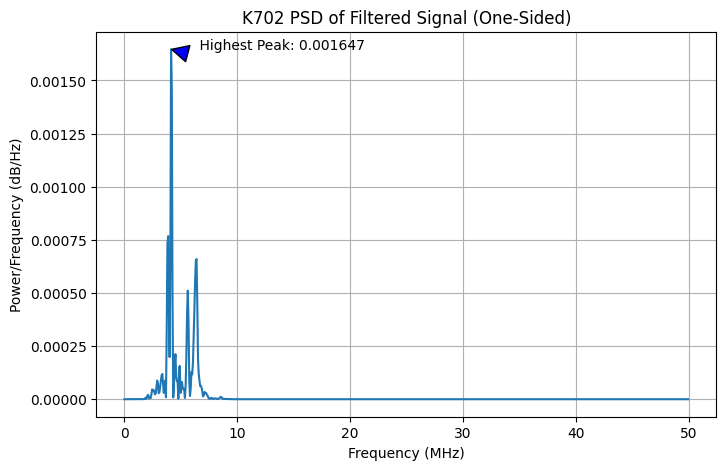

In [188]:
# K702 PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd12, psd_one_sided12)
plt.annotate(f'    Highest Peak: {psd_one_sided12[highest_peak]:.6f}', 
             xy=(freq_psd12[highest_peak], 
                 psd_one_sided12[highest_peak]),
             xytext=(freq_psd12[highest_peak]+1, psd_one_sided12[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('K702 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')